In [ ]:
pip install pmdarima

In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from mpl_toolkits.basemap import Basemap, cm
from pylab import rcParams
from matplotlib import animation
import statsmodels.api as sm
import pmdarima

<ipython-input-1-23bf730523df>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
f1=pd.read_csv("fire1992_merged.csv")
f2=pd.read_csv("fire1993_merged.csv")
f3=pd.read_csv("fire1994_merged.csv")
f4=pd.read_csv("fire1995_merged.csv")
f5=pd.read_csv("fire1996_merged.csv")
f6=pd.read_csv("fire1997_merged.csv")
f7=pd.read_csv("fire1998_merged.csv")
f8=pd.read_csv("fire1999_merged.csv")
f9=pd.read_csv("fire2000_merged.csv")
f10=pd.read_csv("fire2001_merged.csv")
#f11=pd.read_csv("fire2001_merged.csv")
f12=pd.read_csv("fire2002_merged.csv")
f13=pd.read_csv("fire2003_merged.csv")
f14=pd.read_csv("fire2004_merged.csv")
f15=pd.read_csv("fire2005_merged.csv")
f16=pd.read_csv("fire2006_merged.csv")
f17=pd.read_csv("fire2007_merged.csv")
f18=pd.read_csv("fire2008_merged.csv")
f19=pd.read_csv("fire2009_merged.csv")
f20=pd.read_csv("fire2010_merged.csv")
f21=pd.read_csv("fire2011_merged.csv")
f22=pd.read_csv("fire2012_merged.csv")
f23=pd.read_csv("fire2013_merged.csv")
f24=pd.read_csv("fire2014_merged.csv")
f25=pd.read_csv("fire2015_merged.csv")

In [3]:
Final_df = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9,f10, f12, f13, f14, f15, f16, f17, f18, f19, f20
                     ,f21, f22, f23, f24, f25], axis=0, ignore_index=True)

In [4]:
Final_df

,Unnamed: 0.1,Unnamed: 0,FOD_ID,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,d_min,c_month,c_day,c_hour,c_min,temp_start,dewPointTemp_start,RelHumidity_start,Windspeed_start,FeltTemp_start
0,0,52738,53173,FS-276639,NaN,1992,99,1305,7.0,Arson,...,5,4,9,14,40,77.080864,62.354927,52.192808,10.306146,77.080864
1,1,52739,53174,FS-276641,NaN,1992,133,1400,7.0,Arson,...,0,5,13,19,0,87.979259,72.273413,51.371132,11.006068,87.979259
2,2,52740,53175,FS-276642,NaN,1992,171,1830,7.0,Arson,...,30,6,21,2,0,91.937453,74.402587,48.549445,11.629194,91.937453
3,3,52741,53176,FS-276644,NaN,1992,214,1330,7.0,Arson,...,30,8,2,17,45,89.245916,73.975209,53.836260,12.505792,89.245916
4,4,52742,53177,FS-276646,NaN,1992,244,815,7.0,Arson,...,15,9,2,11,30,93.795612,74.671379,43.929501,14.549308,93.795612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142016,8299,1856360,300289501,SFO-2015TXTXS3689,COMANCHE,2015,292,-1,13.0,Missing/Undefined,...,-1,10,19,18,20,83.107444,42.881027,20.688935,11.540721,83.107444
142017,8300,1856399,300289541,SFO-2015TXTXS3723,6300,2015,294,1948,13.0,Missing/Undefined,...,48,10,21,22,17,84.382203,65.120486,40.139739,11.107564,84.382203
142018,8301,1856439,300289582,SFO-2015TXTXS3737,HOUSE,2015,301,1150,13.0,Missing/Undefined,...,50,10,28,12,55,75.767986,57.497257,38.054443,17.529314,75.767986
142019,8302,1859961,300293785,ICS209_2015_2714938,CAVANAL FIRE,2015,40,1645,13.0,Missing/Undefined,...,45,-1,-1,-1,-1,74.511573,53.259333,26.150232,14.466976,74.511573


In [5]:
Final_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FOD_ID', 'FPA_ID', 'FIRE_NAME',
       'FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'd_month', 'd_day',
       'd_hour', 'd_min', 'c_month', 'c_day', 'c_hour', 'c_min', 'temp_start',
       'dewPointTemp_start', 'RelHumidity_start', 'Windspeed_start',
       'FeltTemp_start'],
      dtype='object')

In [6]:
Final_df["Date_ts"]=Final_df["FIRE_YEAR"].astype(str)+"-"+(Final_df["d_month"].astype(str)).str.zfill(2)


In [7]:
grp_fire =Final_df.groupby("Date_ts",as_index=False)["FIRE_SIZE"].sum()
grp_fire_count = Final_df.groupby("Date_ts",as_index=False)["FIRE_SIZE"].count()

In [8]:
grp_fire

,Date_ts,FIRE_SIZE
0,1992-01,712.00
1,1992-02,1782.90
2,1992-03,1944.90
3,1992-04,950.70
4,1992-05,301.40
...,...,...
283,2015-08,89660.96
284,2015-09,32109.10
285,2015-10,29516.56
286,2015-11,5878.56


In [9]:
grp_fire.to_csv("time_seriesall.csv")

In [10]:
fire_ts = pd.read_csv("time_seriesall.csv",index_col=0)

In [11]:
fire_ts["Date_ts"]=pd.to_datetime(fire_ts["Date_ts"])

In [12]:
fire_ts

,Date_ts,FIRE_SIZE
0,1992-01-01,712.00
1,1992-02-01,1782.90
2,1992-03-01,1944.90
3,1992-04-01,950.70
4,1992-05-01,301.40
...,...,...
283,2015-08-01,89660.96
284,2015-09-01,32109.10
285,2015-10-01,29516.56
286,2015-11-01,5878.56


In [13]:
check_nan = fire_ts.isnull().values.any()
check_nan

False

<AxesSubplot: >

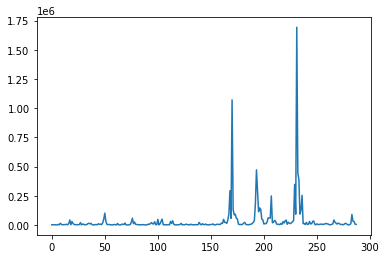

In [14]:
fire_ts["FIRE_SIZE"].plot()

In [15]:
fire_ts.set_index("Date_ts",inplace=True)
fire_ts

,FIRE_SIZE
Date_ts,
1992-01-01,712.00
1992-02-01,1782.90
1992-03-01,1944.90
1992-04-01,950.70
1992-05-01,301.40
...,...
2015-08-01,89660.96
2015-09-01,32109.10
2015-10-01,29516.56


In [16]:
fire_ts.to_csv("time_series_fi.csv")

In [17]:
fire_ts=pd.read_csv("time_series_fi.csv",index_col=0,header=0)

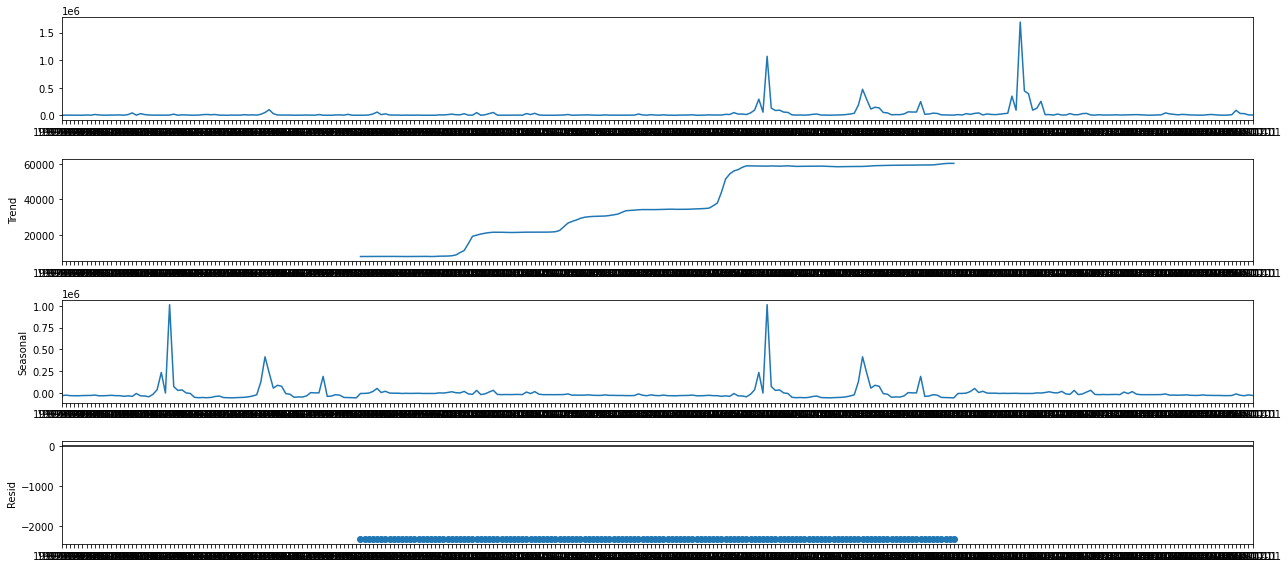

In [18]:
rcParams['figure.figsize'] = 18, 8
r=sm.tsa.seasonal_decompose(fire_ts, model = 'additive',period = int(len(fire_ts)/2))
fig = r.plot()
plt.show()


In [19]:
fire_ts.index = pd.DatetimeIndex(fire_ts.index).to_period('M')

In [20]:
fire_ts.index.dtype

period[M]

In [21]:

from statsmodels.tsa.stattools import adfuller

test_r=adfuller(fire_ts["FIRE_SIZE"])

#H0: Not stationary
#H1: Stationary

def adfuller_test(x):
    result = adfuller(x)
    labels=["Test-statistic","p-value","#lags used","No. of observations"]
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("strong evidence against Null hypothess")
    else:
        print("weak evidence agaisnt null hypothesis")

adfuller_test(fire_ts["FIRE_SIZE"].dropna()) # p-value very small so stationary 

Test-statistic:-7.274804516066277
p-value:1.5544714927980242e-10
#lags used:1
No. of observations:286
strong evidence against Null hypothess


In [22]:
#as it's already stationary no point in differencing 

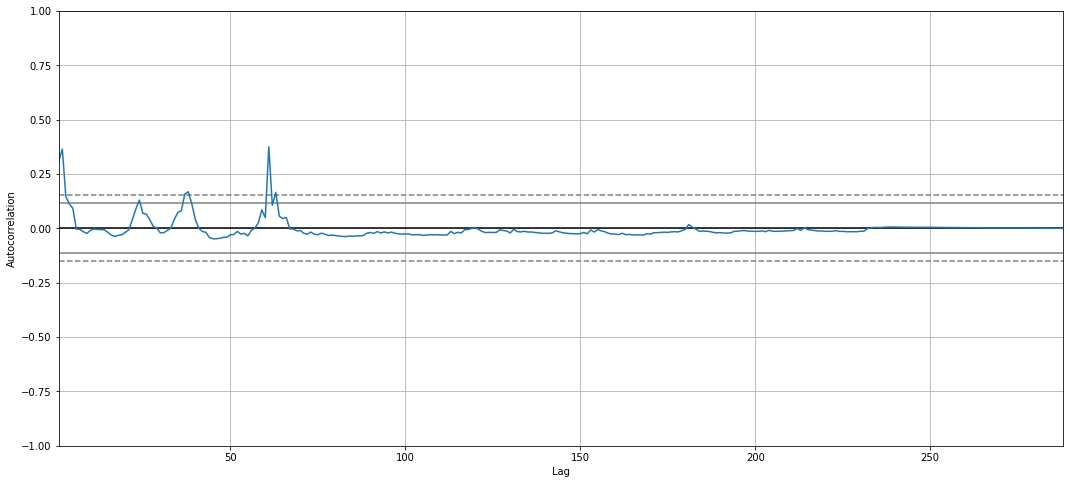

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fire_ts["FIRE_SIZE"])
plt.show()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


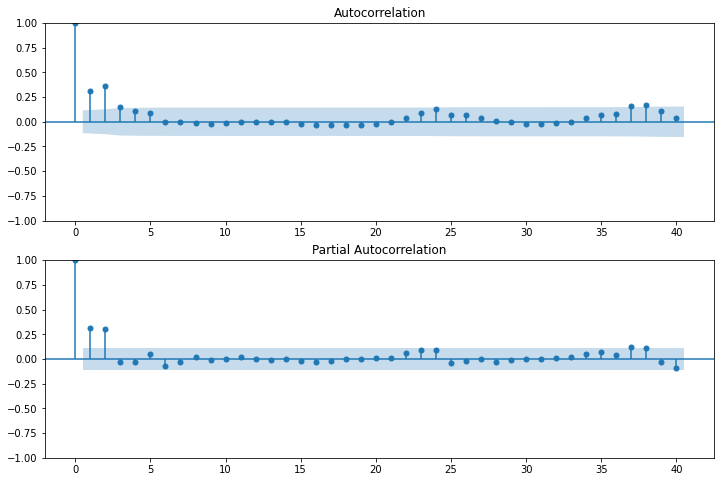

In [25]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(fire_ts["FIRE_SIZE"],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(fire_ts["FIRE_SIZE"],lags=40,ax=ax2)

In [26]:
fire_ts

,FIRE_SIZE
Date_ts,
1992-01,712.00
1992-02,1782.90
1992-03,1944.90
1992-04,950.70
1992-05,301.40
...,...
2015-08,89660.96
2015-09,32109.10
2015-10,29516.56


In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
# model = auto_arima(fire_ts["FIRE_SIZE"][0:250], seasonal=False)
# order = model.order
# model
# #model = ARIMA(fire_ts["FIRE_SIZE"][250:], order=order)
# #model_fit = model.fit()
# a=model_fit.forecast(steps=27)
# a

In [29]:
# model=ARIMA(fire_ts["FIRE_SIZE"][0:250],order=(1,0,0))
# model_fit=model.fit()
# print(model_fit.summary())

In [30]:
from math import sqrt

In [39]:
X = fire_ts.FIRE_SIZE
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#plt.plot(test)
# plt.plot(predictions, color='red')
# plt.show()

Test RMSE: 222581.642


<AxesSubplot: xlabel='Date_ts'>

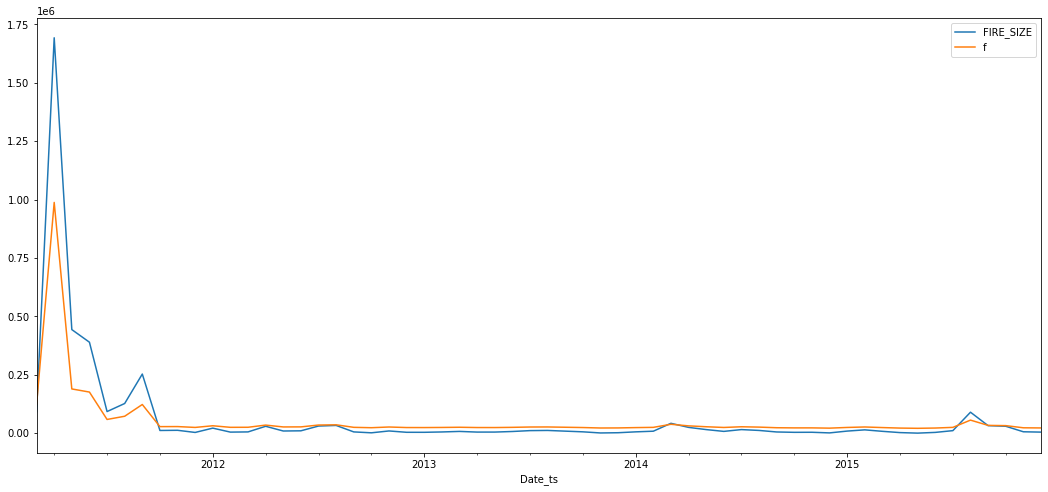

In [36]:
a=test.to_frame()
a["f"]=predictions
a.plot()

In [37]:
a

,FIRE_SIZE,f
Date_ts,,
2011-03,91973.31,122831.322255
2011-04,1692466.69,987655.616675
2011-05,443337.87,189256.655132
2011-06,389274.39,175882.788151
2011-07,92419.20,58628.329816
2011-08,126933.08,72332.703963
2011-09,253000.65,122646.272841
2011-10,11445.45,27931.204779
2011-11,12219.96,28161.630260


In [35]:
#grid search

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                        print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [36]:
p_values = [0,1,2,3,4,5]
d_values = range(0, 3)
q_values = range(0, 3)

In [37]:
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
 # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [38]:
evaluate_models(fire_ts.FIRE_SIZE, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=233777.537
ARIMA(0, 0, 1) MSE=226940.184
ARIMA(0, 0, 2) MSE=218288.480


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1) MSE=217744.545


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ishan\anaconda3\lib\s

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

Best ARIMA(1, 0, 1) MSE=217744.545


### Model is seasonal 

In [39]:
#so need to implement SARIMAX
# as we can see that there is some seasonality thats why we are trying sarima as well - adfuller test not for detecting
# non-stationary due to seasonality part

In [40]:
import itertools

In [70]:
p = d = q = range(0, 3)
s=range(0,12)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(p, d, q,s))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='M'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df
    
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
sarimax_gridsearch(fire_ts, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 0)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 2)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 3)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 4)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 5)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 6)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 7)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 8)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 9)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 10)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 0, 11)12 : BIC Calculated =7602.035238844763
SARIMAX (0, 0, 0) x (0, 0, 1, 2)12 : BIC Calculated =7513.661906536349
SARIMAX (0, 0, 0) x (0, 0, 1, 3)12 : BIC Calculated =7520.586311886573
SARIMAX (0, 0, 0) x (0, 0, 1, 4)12 : BIC Calculated =7498.192796332106
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (0, 2, 1, 6)12 : BIC Calculated =7326.571468643924
SARIMAX (0, 0, 0) x (0, 2, 1, 7)12 : BIC Calculated =7260.229002845355
SARIMAX (0, 0, 0) x (0, 2, 1, 8)12 : BIC Calculated =7171.599388100238
SARIMAX (0, 0, 0) x (0, 2, 1, 9)12 : BIC Calculated =7085.844680967202
SARIMAX (0, 0, 0) x (0, 2, 1, 10)12 : BIC Calculated =7014.2266377798405
SARIMAX (0, 0, 0) x (0, 2, 1, 11)12 : BIC Calculated =6943.596838530004
SARIMAX (0, 0, 0) x (0, 2, 2, 2)12 : BIC Calculated =7416.384411364389
SARIMAX (0, 0, 0) x (0, 2, 2, 3)12 : BIC Calculated =7353.413869925128
SARIMAX (0, 0, 0) x (0, 2, 2, 4)12 : BIC Calculated =7273.729524323526
SARIMAX (0, 0, 0) x (0, 2, 2, 5)12 : BIC Calculated =7194.012203788525
SARIMAX (0, 0, 0) x (0, 2, 2, 6)12 : BIC Calculated =7097.461756180237
SARIMAX (0, 0, 0) x (0, 2, 2, 7)12 : BIC Calculated =7011.232770879342
SARIMAX (0, 0, 0) x (0, 2, 2, 8)12 : BIC Calculated =6905.193656704999


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (0, 2, 2, 9)12 : BIC Calculated =6808.1363776122
SARIMAX (0, 0, 0) x (0, 2, 2, 10)12 : BIC Calculated =6688.4173539952535
SARIMAX (0, 0, 0) x (0, 2, 2, 11)12 : BIC Calculated =6612.169832635215
SARIMAX (0, 0, 0) x (1, 0, 0, 2)12 : BIC Calculated =7530.945436123208
SARIMAX (0, 0, 0) x (1, 0, 0, 3)12 : BIC Calculated =7544.9722675135745
SARIMAX (0, 0, 0) x (1, 0, 0, 4)12 : BIC Calculated =7523.002713318185
SARIMAX (0, 0, 0) x (1, 0, 0, 5)12 : BIC Calculated =7499.317665258264
SARIMAX (0, 0, 0) x (1, 0, 0, 6)12 : BIC Calculated =7479.245314132498
SARIMAX (0, 0, 0) x (1, 0, 0, 7)12 : BIC Calculated =7453.780320359657
SARIMAX (0, 0, 0) x (1, 0, 0, 8)12 : BIC Calculated =7428.586435230545
SARIMAX (0, 0, 0) x (1, 0, 0, 9)12 : BIC Calculated =7403.27064013896
SARIMAX (0, 0, 0) x (1, 0, 0, 10)12 : BIC Calculated =7377.4219083005255
SARIMAX (0, 0, 0) x (1, 0, 0, 11)12 : BIC Calculated =7351.715327204352
SARIMAX (0, 0, 0) x (1, 0, 1, 2)12 : BIC Calculated =7511.308970861197
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 0) x (1, 2, 2, 2)12 : BIC Calculated =7389.762804328033
SARIMAX (0, 0, 0) x (1, 2, 2, 3)12 : BIC Calculated =7342.702369993325
SARIMAX (0, 0, 0) x (1, 2, 2, 4)12 : BIC Calculated =7251.591006904167
SARIMAX (0, 0, 0) x (1, 2, 2, 5)12 : BIC Calculated =7157.365757148573
SARIMAX (0, 0, 0) x (1, 2, 2, 6)12 : BIC Calculated =7053.349800912403
SARIMAX (0, 0, 0) x (1, 2, 2, 7)12 : BIC Calculated =6965.052045674134
SARIMAX (0, 0, 0) x (1, 2, 2, 8)12 : BIC Calculated =6878.70477951901
SARIMAX (0, 0, 0) x (1, 2, 2, 9)12 : BIC Calculated =6770.88563972288
SARIMAX (0, 0, 0) x (1, 2, 2, 10)12 : BIC Calculated =6656.561625928036
SARIMAX (0, 0, 0) x (1, 2, 2, 11)12 : BIC Calculated =6562.47002357635
SARIMAX (0, 0, 0) x (2, 0, 0, 2)12 : BIC Calculated =7485.97788894209
SARIMAX (0, 0, 0) x (2, 0, 0, 3)12 : BIC Calculated =7474.1544646334405
SARIMAX (0, 0, 0) x (2, 0, 0, 4)12 : BIC Calculated =7426.64962050177
SARIMAX (0, 0, 0) x (2, 0, 0, 5)12 : BIC Calculated =7377.250713758658
SARIMAX 

SARIMAX (0, 0, 1) x (0, 0, 1, 9)12 : BIC Calculated =7336.48956064437
SARIMAX (0, 0, 1) x (0, 0, 1, 10)12 : BIC Calculated =7310.803222190618
SARIMAX (0, 0, 1) x (0, 0, 1, 11)12 : BIC Calculated =7285.3086209784415
SARIMAX (0, 0, 1) x (0, 0, 2, 2)12 : BIC Calculated =7429.030183901965
SARIMAX (0, 0, 1) x (0, 0, 2, 3)12 : BIC Calculated =7415.278646442611
SARIMAX (0, 0, 1) x (0, 0, 2, 4)12 : BIC Calculated =7363.207425076676
SARIMAX (0, 0, 1) x (0, 0, 2, 5)12 : BIC Calculated =7312.578116730491
SARIMAX (0, 0, 1) x (0, 0, 2, 6)12 : BIC Calculated =7265.411232901824
SARIMAX (0, 0, 1) x (0, 0, 2, 7)12 : BIC Calculated =7214.042920980986
SARIMAX (0, 0, 1) x (0, 0, 2, 8)12 : BIC Calculated =7163.69693705819
SARIMAX (0, 0, 1) x (0, 0, 2, 9)12 : BIC Calculated =7112.832166526245
SARIMAX (0, 0, 1) x (0, 0, 2, 10)12 : BIC Calculated =7061.521359459651
SARIMAX (0, 0, 1) x (0, 0, 2, 11)12 : BIC Calculated =7009.389614761724
SARIMAX (0, 0, 1) x (0, 1, 0, 2)12 : BIC Calculated =7568.1969116163855
SA

SARIMAX (0, 0, 1) x (1, 1, 1, 4)12 : BIC Calculated =7396.795257634154
SARIMAX (0, 0, 1) x (1, 1, 1, 5)12 : BIC Calculated =7345.657485888688
SARIMAX (0, 0, 1) x (1, 1, 1, 6)12 : BIC Calculated =7310.6266963617945
SARIMAX (0, 0, 1) x (1, 1, 1, 7)12 : BIC Calculated =7256.2288538565235
SARIMAX (0, 0, 1) x (1, 1, 1, 8)12 : BIC Calculated =7206.80916330322
SARIMAX (0, 0, 1) x (1, 1, 1, 9)12 : BIC Calculated =7156.5183659949635
SARIMAX (0, 0, 1) x (1, 1, 1, 10)12 : BIC Calculated =7104.889200782142
SARIMAX (0, 0, 1) x (1, 1, 1, 11)12 : BIC Calculated =7052.245128316015
SARIMAX (0, 0, 1) x (1, 1, 2, 2)12 : BIC Calculated =7395.518015549442
SARIMAX (0, 0, 1) x (1, 1, 2, 3)12 : BIC Calculated =7372.395175243129
SARIMAX (0, 0, 1) x (1, 1, 2, 4)12 : BIC Calculated =7298.398271809518
SARIMAX (0, 0, 1) x (1, 1, 2, 5)12 : BIC Calculated =7221.391344132218
SARIMAX (0, 0, 1) x (1, 1, 2, 6)12 : BIC Calculated =7159.11116460053
SARIMAX (0, 0, 1) x (1, 1, 2, 7)12 : BIC Calculated =7079.118915720404
SAR

SARIMAX (0, 0, 1) x (2, 2, 0, 10)12 : BIC Calculated =6887.675385688352
SARIMAX (0, 0, 1) x (2, 2, 0, 11)12 : BIC Calculated =6774.708873553623
SARIMAX (0, 0, 1) x (2, 2, 1, 2)12 : BIC Calculated =7569.099004883481
SARIMAX (0, 0, 1) x (2, 2, 1, 3)12 : BIC Calculated =7550.638457016346
SARIMAX (0, 0, 1) x (2, 2, 1, 4)12 : BIC Calculated =7449.386982754077
SARIMAX (0, 0, 1) x (2, 2, 1, 5)12 : BIC Calculated =7341.3739322420715
SARIMAX (0, 0, 1) x (2, 2, 1, 6)12 : BIC Calculated =7269.034592210335
SARIMAX (0, 0, 1) x (2, 2, 1, 7)12 : BIC Calculated =7155.718996162141
SARIMAX (0, 0, 1) x (2, 2, 1, 8)12 : BIC Calculated =7046.807072437188
SARIMAX (0, 0, 1) x (2, 2, 1, 9)12 : BIC Calculated =6946.070652184577
SARIMAX (0, 0, 1) x (2, 2, 1, 10)12 : BIC Calculated =6836.239535112085
SARIMAX (0, 0, 1) x (2, 2, 1, 11)12 : BIC Calculated =6728.88532164633
SARIMAX (0, 0, 1) x (2, 2, 2, 2)12 : BIC Calculated =7505.878705378488
SARIMAX (0, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =7487.808096427655
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =7096.472372535574
SARIMAX (0, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =6991.883130222931
SARIMAX (0, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =6888.294064491163
SARIMAX (0, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =6778.898643844626
SARIMAX (0, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =6672.924719563797
SARIMAX (0, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 5)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 6)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 7)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 8)12 : BIC Calculated =7502.083922731286
SARIMAX (0, 0, 2) x (0, 0, 0, 9)12 : BIC Calculated =7502.083922731286
SARI

SARIMAX (0, 0, 2) x (1, 0, 2, 10)12 : BIC Calculated =7010.570435791482
SARIMAX (0, 0, 2) x (1, 0, 2, 11)12 : BIC Calculated =6958.514056042858
SARIMAX (0, 0, 2) x (1, 1, 0, 2)12 : BIC Calculated =7461.71992403625
SARIMAX (0, 0, 2) x (1, 1, 0, 3)12 : BIC Calculated =7540.283806919233
SARIMAX (0, 0, 2) x (1, 1, 0, 4)12 : BIC Calculated =7483.652787097253
SARIMAX (0, 0, 2) x (1, 1, 0, 5)12 : BIC Calculated =7438.426131318584
SARIMAX (0, 0, 2) x (1, 1, 0, 6)12 : BIC Calculated =7403.028333810032
SARIMAX (0, 0, 2) x (1, 1, 0, 7)12 : BIC Calculated =7343.451242745792
SARIMAX (0, 0, 2) x (1, 1, 0, 8)12 : BIC Calculated =7292.796813906523
SARIMAX (0, 0, 2) x (1, 1, 0, 9)12 : BIC Calculated =7244.508585222961
SARIMAX (0, 0, 2) x (1, 1, 0, 10)12 : BIC Calculated =7188.841946546368
SARIMAX (0, 0, 2) x (1, 1, 0, 11)12 : BIC Calculated =7134.652203878032
SARIMAX (0, 0, 2) x (1, 1, 1, 3)12 : BIC Calculated =7398.536160567276
SARIMAX (0, 0, 2) x (1, 1, 1, 4)12 : BIC Calculated =7350.770621994789
SAR

SARIMAX (0, 0, 2) x (2, 2, 0, 4)12 : BIC Calculated =7473.150894971499
SARIMAX (0, 0, 2) x (2, 2, 0, 5)12 : BIC Calculated =7388.870431641649
SARIMAX (0, 0, 2) x (2, 2, 0, 6)12 : BIC Calculated =7314.778065782389
SARIMAX (0, 0, 2) x (2, 2, 0, 7)12 : BIC Calculated =7188.20871221398
SARIMAX (0, 0, 2) x (2, 2, 0, 8)12 : BIC Calculated =7069.472980034581
SARIMAX (0, 0, 2) x (2, 2, 0, 9)12 : BIC Calculated =6972.849915590291
SARIMAX (0, 0, 2) x (2, 2, 0, 10)12 : BIC Calculated =6863.509770233586
SARIMAX (0, 0, 2) x (2, 2, 0, 11)12 : BIC Calculated =6752.949378353155
SARIMAX (0, 0, 2) x (2, 2, 1, 3)12 : BIC Calculated =7545.138778352602
SARIMAX (0, 0, 2) x (2, 2, 1, 4)12 : BIC Calculated =7443.233050921243
SARIMAX (0, 0, 2) x (2, 2, 1, 5)12 : BIC Calculated =7340.398261083673
SARIMAX (0, 0, 2) x (2, 2, 1, 6)12 : BIC Calculated =7266.087609593539
SARIMAX (0, 0, 2) x (2, 2, 1, 7)12 : BIC Calculated =7140.765096203922
SARIMAX (0, 0, 2) x (2, 2, 1, 8)12 : BIC Calculated =7022.567439703108
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =7055.1845034272865
SARIMAX (0, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =6940.683858981356
SARIMAX (0, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =6840.766487571856
SARIMAX (0, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =6730.6237361611375
SARIMAX (0, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =6621.51035269493
SARIMAX (0, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 8)12 : BIC Calculated =7649.958992055721
SARIMAX (0, 1, 0) x (0, 0, 0, 9)12 : BIC Calculated =7649.958992055721
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (0, 2, 1, 5)12 : BIC Calculated =7458.121748031286
SARIMAX (0, 1, 0) x (0, 2, 1, 6)12 : BIC Calculated =7416.214014247114
SARIMAX (0, 1, 0) x (0, 2, 1, 7)12 : BIC Calculated =7323.540629051074
SARIMAX (0, 1, 0) x (0, 2, 1, 8)12 : BIC Calculated =7235.797137877094
SARIMAX (0, 1, 0) x (0, 2, 1, 9)12 : BIC Calculated =7171.717173555737
SARIMAX (0, 1, 0) x (0, 2, 1, 10)12 : BIC Calculated =7087.1728485753565
SARIMAX (0, 1, 0) x (0, 2, 1, 11)12 : BIC Calculated =7004.307806817777
SARIMAX (0, 1, 0) x (0, 2, 2, 2)12 : BIC Calculated =7532.532445108394
SARIMAX (0, 1, 0) x (0, 2, 2, 3)12 : BIC Calculated =7489.327851080472
SARIMAX (0, 1, 0) x (0, 2, 2, 4)12 : BIC Calculated =7402.212867925795
SARIMAX (0, 1, 0) x (0, 2, 2, 5)12 : BIC Calculated =7272.160796729331
SARIMAX (0, 1, 0) x (0, 2, 2, 6)12 : BIC Calculated =7200.030998872314
SARIMAX (0, 1, 0) x (0, 2, 2, 7)12 : BIC Calculated =7094.358561479625
SARIMAX (0, 1, 0) x (0, 2, 2, 8)12 : BIC Calculated =6988.293359763093
SAR

SARIMAX (0, 1, 0) x (2, 0, 1, 2)12 : BIC Calculated =7577.215366558395
SARIMAX (0, 1, 0) x (2, 0, 1, 3)12 : BIC Calculated =7530.464318095434
SARIMAX (0, 1, 0) x (2, 0, 1, 4)12 : BIC Calculated =7486.640802435029
SARIMAX (0, 1, 0) x (2, 0, 1, 5)12 : BIC Calculated =7434.301629400904
SARIMAX (0, 1, 0) x (2, 0, 1, 6)12 : BIC Calculated =7382.284802929718
SARIMAX (0, 1, 0) x (2, 0, 1, 7)12 : BIC Calculated =7332.0400770378765
SARIMAX (0, 1, 0) x (2, 0, 1, 8)12 : BIC Calculated =7279.9729653532795
SARIMAX (0, 1, 0) x (2, 0, 1, 9)12 : BIC Calculated =7228.779443093739
SARIMAX (0, 1, 0) x (2, 0, 1, 10)12 : BIC Calculated =7177.225252030128
SARIMAX (0, 1, 0) x (2, 0, 1, 11)12 : BIC Calculated =7125.638312919
SARIMAX (0, 1, 0) x (2, 0, 2, 2)12 : BIC Calculated =7556.626569385837
SARIMAX (0, 1, 0) x (2, 0, 2, 3)12 : BIC Calculated =7510.522255784055
SARIMAX (0, 1, 0) x (2, 0, 2, 4)12 : BIC Calculated =7466.972880166036
SARIMAX (0, 1, 0) x (2, 0, 2, 5)12 : BIC Calculated =7414.849506678683
SARIM

SARIMAX (0, 1, 1) x (0, 1, 0, 9)12 : BIC Calculated =7496.23169179715
SARIMAX (0, 1, 1) x (0, 1, 0, 10)12 : BIC Calculated =7461.702832808395
SARIMAX (0, 1, 1) x (0, 1, 0, 11)12 : BIC Calculated =7431.268367137072
SARIMAX (0, 1, 1) x (0, 1, 1, 2)12 : BIC Calculated =7477.028592601485
SARIMAX (0, 1, 1) x (0, 1, 1, 3)12 : BIC Calculated =7483.0827347929035
SARIMAX (0, 1, 1) x (0, 1, 1, 4)12 : BIC Calculated =7394.282016537169
SARIMAX (0, 1, 1) x (0, 1, 1, 5)12 : BIC Calculated =7334.116425212296
SARIMAX (0, 1, 1) x (0, 1, 1, 6)12 : BIC Calculated =7292.396557677477
SARIMAX (0, 1, 1) x (0, 1, 1, 7)12 : BIC Calculated =7232.991418728959
SARIMAX (0, 1, 1) x (0, 1, 1, 8)12 : BIC Calculated =7182.142256311826
SARIMAX (0, 1, 1) x (0, 1, 1, 9)12 : BIC Calculated =7128.258056724902
SARIMAX (0, 1, 1) x (0, 1, 1, 10)12 : BIC Calculated =7071.5353643111985
SARIMAX (0, 1, 1) x (0, 1, 1, 11)12 : BIC Calculated =7019.4400775599315
SARIMAX (0, 1, 1) x (0, 1, 2, 2)12 : BIC Calculated =7425.082181505489


SARIMAX (0, 1, 1) x (1, 2, 0, 5)12 : BIC Calculated =7579.569892928246
SARIMAX (0, 1, 1) x (1, 2, 0, 6)12 : BIC Calculated =7512.8214176035835
SARIMAX (0, 1, 1) x (1, 2, 0, 7)12 : BIC Calculated =7417.591496977211
SARIMAX (0, 1, 1) x (1, 2, 0, 8)12 : BIC Calculated =7346.480203984581
SARIMAX (0, 1, 1) x (1, 2, 0, 9)12 : BIC Calculated =7256.799231229025
SARIMAX (0, 1, 1) x (1, 2, 0, 10)12 : BIC Calculated =7165.729051429152
SARIMAX (0, 1, 1) x (1, 2, 0, 11)12 : BIC Calculated =7079.726419509186
SARIMAX (0, 1, 1) x (1, 2, 1, 2)12 : BIC Calculated =7662.066528663091
SARIMAX (0, 1, 1) x (1, 2, 1, 3)12 : BIC Calculated =7689.481510125423
SARIMAX (0, 1, 1) x (1, 2, 1, 4)12 : BIC Calculated =7547.825850471577
SARIMAX (0, 1, 1) x (1, 2, 1, 5)12 : BIC Calculated =7450.682555653476
SARIMAX (0, 1, 1) x (1, 2, 1, 6)12 : BIC Calculated =7385.63644831181
SARIMAX (0, 1, 1) x (1, 2, 1, 7)12 : BIC Calculated =7289.383372943689
SARIMAX (0, 1, 1) x (1, 2, 1, 8)12 : BIC Calculated =7209.600711314543
SARI

SARIMAX (0, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =6757.6170234017145
SARIMAX (0, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =6650.988145640095
SARIMAX (0, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 7)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 8)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 9)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 10)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 0, 11)12 : BIC Calculated =7498.179567370503
SARIMAX (0, 1, 2) x (0, 0, 1, 3)12 : BIC Calculated =7422.632481808578
S

SARIMAX (0, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =7585.629930210198
SARIMAX (0, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =7516.933183234144
SARIMAX (0, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =7467.2665446749315
SARIMAX (0, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =7421.04130259375
SARIMAX (0, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =7355.505861924258
SARIMAX (0, 1, 2) x (1, 1, 0, 8)12 : BIC Calculated =7307.538241852845
SARIMAX (0, 1, 2) x (1, 1, 0, 9)12 : BIC Calculated =7253.3420041059
SARIMAX (0, 1, 2) x (1, 1, 0, 10)12 : BIC Calculated =7198.533266155473
SARIMAX (0, 1, 2) x (1, 1, 0, 11)12 : BIC Calculated =7138.580981901783
SARIMAX (0, 1, 2) x (1, 1, 1, 3)12 : BIC Calculated =7462.347051251633
SARIMAX (0, 1, 2) x (1, 1, 1, 4)12 : BIC Calculated =7388.534028562267
SARIMAX (0, 1, 2) x (1, 1, 1, 5)12 : BIC Calculated =7327.9346945844645
SARIMAX (0, 1, 2) x (1, 1, 1, 6)12 : BIC Calculated =7282.672237604645
SARIMAX (0, 1, 2) x (1, 1, 1, 7)12 : BIC Calculated =7214.276185224129
SARIM

SARIMAX (0, 1, 2) x (2, 2, 0, 6)12 : BIC Calculated =7340.309676814755
SARIMAX (0, 1, 2) x (2, 2, 0, 7)12 : BIC Calculated =7201.733711477765
SARIMAX (0, 1, 2) x (2, 2, 0, 8)12 : BIC Calculated =7087.327380881866
SARIMAX (0, 1, 2) x (2, 2, 0, 9)12 : BIC Calculated =6979.985541046879
SARIMAX (0, 1, 2) x (2, 2, 0, 10)12 : BIC Calculated =6868.487883467835
SARIMAX (0, 1, 2) x (2, 2, 0, 11)12 : BIC Calculated =6755.862260390623
SARIMAX (0, 1, 2) x (2, 2, 1, 3)12 : BIC Calculated =7663.913649350616
SARIMAX (0, 1, 2) x (2, 2, 1, 4)12 : BIC Calculated =7520.264511230991
SARIMAX (0, 1, 2) x (2, 2, 1, 5)12 : BIC Calculated =7397.449310179138
SARIMAX (0, 1, 2) x (2, 2, 1, 6)12 : BIC Calculated =7295.733615135117
SARIMAX (0, 1, 2) x (2, 2, 1, 7)12 : BIC Calculated =7156.318171918721
SARIMAX (0, 1, 2) x (2, 2, 1, 8)12 : BIC Calculated =7044.862661348281
SARIMAX (0, 1, 2) x (2, 2, 1, 9)12 : BIC Calculated =6930.432231622327
SARIMAX (0, 1, 2) x (2, 2, 1, 10)12 : BIC Calculated =6817.647021992237
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 2, 1, 5)12 : BIC Calculated =7785.736591231367
SARIMAX (0, 2, 0) x (0, 2, 1, 6)12 : BIC Calculated =7747.703018543398
SARIMAX (0, 2, 0) x (0, 2, 1, 7)12 : BIC Calculated =7644.215313055013
SARIMAX (0, 2, 0) x (0, 2, 1, 8)12 : BIC Calculated =7563.276829080078
SARIMAX (0, 2, 0) x (0, 2, 1, 9)12 : BIC Calculated =7488.411121235567


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (0, 2, 1, 10)12 : BIC Calculated =7401.522759395518
SARIMAX (0, 2, 0) x (0, 2, 1, 11)12 : BIC Calculated =7319.043669729971
SARIMAX (0, 2, 0) x (0, 2, 2, 2)12 : BIC Calculated =7847.362213833971
SARIMAX (0, 2, 0) x (0, 2, 2, 3)12 : BIC Calculated =7869.838520629828
SARIMAX (0, 2, 0) x (0, 2, 2, 4)12 : BIC Calculated =7757.70705691795
SARIMAX (0, 2, 0) x (0, 2, 2, 5)12 : BIC Calculated =7625.127828689719
SARIMAX (0, 2, 0) x (0, 2, 2, 6)12 : BIC Calculated =7554.336238960397
SARIMAX (0, 2, 0) x (0, 2, 2, 7)12 : BIC Calculated =7432.622617787868
SARIMAX (0, 2, 0) x (0, 2, 2, 8)12 : BIC Calculated =7327.615501932881
SARIMAX (0, 2, 0) x (0, 2, 2, 9)12 : BIC Calculated =7230.359467031734
SARIMAX (0, 2, 0) x (0, 2, 2, 10)12 : BIC Calculated =7118.138914314801
SARIMAX (0, 2, 0) x (0, 2, 2, 11)12 : BIC Calculated =7013.232340371252
SARIMAX (0, 2, 0) x (1, 0, 0, 2)12 : BIC Calculated =7887.15862620556
SARIMAX (0, 2, 0) x (1, 0, 0, 3)12 : BIC Calculated =7890.4728913471035
SAR

SARIMAX (0, 2, 0) x (2, 0, 1, 7)12 : BIC Calculated =7611.986241031924
SARIMAX (0, 2, 0) x (2, 0, 1, 8)12 : BIC Calculated =7558.396018954788
SARIMAX (0, 2, 0) x (2, 0, 1, 9)12 : BIC Calculated =7504.415830205771
SARIMAX (0, 2, 0) x (2, 0, 1, 10)12 : BIC Calculated =7450.558923267719
SARIMAX (0, 2, 0) x (2, 0, 1, 11)12 : BIC Calculated =7396.746748085157
SARIMAX (0, 2, 0) x (2, 0, 2, 2)12 : BIC Calculated =7818.955752121465
SARIMAX (0, 2, 0) x (2, 0, 2, 3)12 : BIC Calculated =7797.485120695848
SARIMAX (0, 2, 0) x (2, 0, 2, 4)12 : BIC Calculated =7752.516105972214
SARIMAX (0, 2, 0) x (2, 0, 2, 5)12 : BIC Calculated =7698.231454569743
SARIMAX (0, 2, 0) x (2, 0, 2, 6)12 : BIC Calculated =7633.390978480963
SARIMAX (0, 2, 0) x (2, 0, 2, 7)12 : BIC Calculated =7584.496866857365
SARIMAX (0, 2, 0) x (2, 0, 2, 8)12 : BIC Calculated =7539.010656964137
SARIMAX (0, 2, 0) x (2, 0, 2, 9)12 : BIC Calculated =7474.98513656446
SARIMAX (0, 2, 0) x (2, 0, 2, 10)12 : BIC Calculated =7432.455415941384
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 0, 6)12 : BIC Calculated =7589.280136140808
SARIMAX (0, 2, 0) x (2, 2, 0, 7)12 : BIC Calculated =7462.047197836294


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 0, 8)12 : BIC Calculated =7347.848580749717
SARIMAX (0, 2, 0) x (2, 2, 0, 9)12 : BIC Calculated =7236.860033701444
SARIMAX (0, 2, 0) x (2, 2, 0, 10)12 : BIC Calculated =7128.279256639217
SARIMAX (0, 2, 0) x (2, 2, 0, 11)12 : BIC Calculated =7017.871517366356
SARIMAX (0, 2, 0) x (2, 2, 1, 2)12 : BIC Calculated =7844.669409294027
SARIMAX (0, 2, 0) x (2, 2, 1, 3)12 : BIC Calculated =7797.873902500988
SARIMAX (0, 2, 0) x (2, 2, 1, 4)12 : BIC Calculated =7673.734065567974
SARIMAX (0, 2, 0) x (2, 2, 1, 5)12 : BIC Calculated =7555.297064537194
SARIMAX (0, 2, 0) x (2, 2, 1, 6)12 : BIC Calculated =7458.149822705657
SARIMAX (0, 2, 0) x (2, 2, 1, 7)12 : BIC Calculated =7340.833780019143
SARIMAX (0, 2, 0) x (2, 2, 1, 8)12 : BIC Calculated =7222.7591356874145
SARIMAX (0, 2, 0) x (2, 2, 1, 9)12 : BIC Calculated =7119.752658828673
SARIMAX (0, 2, 0) x (2, 2, 1, 10)12 : BIC Calculated =7009.355027612499
SARIMAX (0, 2, 0) x (2, 2, 1, 11)12 : BIC Calculated =6899.955616499611
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 2, 0, 4)12 : BIC Calculated =7955.355465096974
SARIMAX (0, 2, 1) x (0, 2, 0, 5)12 : BIC Calculated =7835.119868936815


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 1) x (0, 2, 0, 6)12 : BIC Calculated =7826.156726298152
SARIMAX (0, 2, 1) x (0, 2, 0, 7)12 : BIC Calculated =7736.289785012503
SARIMAX (0, 2, 1) x (0, 2, 0, 8)12 : BIC Calculated =7694.99517166568
SARIMAX (0, 2, 1) x (0, 2, 0, 9)12 : BIC Calculated =7638.254602026813
SARIMAX (0, 2, 1) x (0, 2, 0, 10)12 : BIC Calculated =7574.283474102239
SARIMAX (0, 2, 1) x (0, 2, 0, 11)12 : BIC Calculated =7524.02429055775
SARIMAX (0, 2, 1) x (0, 2, 1, 2)12 : BIC Calculated =7808.918770005577
SARIMAX (0, 2, 1) x (0, 2, 1, 3)12 : BIC Calculated =7920.991255549997
SARIMAX (0, 2, 1) x (0, 2, 1, 4)12 : BIC Calculated =7762.80728356448
SARIMAX (0, 2, 1) x (0, 2, 1, 5)12 : BIC Calculated =7583.430800615351
SARIMAX (0, 2, 1) x (0, 2, 1, 6)12 : BIC Calculated =7546.088164375637
SARIMAX (0, 2, 1) x (0, 2, 1, 7)12 : BIC Calculated =7417.910594874734
SARIMAX (0, 2, 1) x (0, 2, 1, 8)12 : BIC Calculated =7364.1828821292665
SARIMAX (0, 2, 1) x (0, 2, 1, 9)12 : BIC Calculated =7270.956738197465
SARIMA

SARIMAX (0, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =7525.3303481816865
SARIMAX (0, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =7477.894423307815
SARIMAX (0, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =7425.138703488533
SARIMAX (0, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =7372.5803479728675
SARIMAX (0, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =7321.218684249438
SARIMAX (0, 2, 1) x (2, 0, 0, 8)12 : BIC Calculated =7268.960125653366
SARIMAX (0, 2, 1) x (2, 0, 0, 9)12 : BIC Calculated =7216.59569513425
SARIMAX (0, 2, 1) x (2, 0, 0, 10)12 : BIC Calculated =7164.367503687466
SARIMAX (0, 2, 1) x (2, 0, 0, 11)12 : BIC Calculated =7112.1015749271055
SARIMAX (0, 2, 1) x (2, 0, 1, 2)12 : BIC Calculated =7580.0064398308605
SARIMAX (0, 2, 1) x (2, 0, 1, 3)12 : BIC Calculated =7530.921540866616
SARIMAX (0, 2, 1) x (2, 0, 1, 4)12 : BIC Calculated =7482.495565953844
SARIMAX (0, 2, 1) x (2, 0, 1, 5)12 : BIC Calculated =7429.120939896272
SARIMAX (0, 2, 1) x (2, 0, 1, 6)12 : BIC Calculated =7375.08472194398
SA

SARIMAX (0, 2, 2) x (0, 0, 2, 10)12 : BIC Calculated =6997.606525225319
SARIMAX (0, 2, 2) x (0, 0, 2, 11)12 : BIC Calculated =6946.201277003342
SARIMAX (0, 2, 2) x (0, 1, 0, 2)12 : BIC Calculated =7587.464143352693
SARIMAX (0, 2, 2) x (0, 1, 0, 3)12 : BIC Calculated =7730.170955971803
SARIMAX (0, 2, 2) x (0, 1, 0, 4)12 : BIC Calculated =7656.855774403198
SARIMAX (0, 2, 2) x (0, 1, 0, 5)12 : BIC Calculated =7615.901100749805
SARIMAX (0, 2, 2) x (0, 1, 0, 6)12 : BIC Calculated =7612.235587775378
SARIMAX (0, 2, 2) x (0, 1, 0, 7)12 : BIC Calculated =7513.514876072014
SARIMAX (0, 2, 2) x (0, 1, 0, 8)12 : BIC Calculated =7519.599191607641
SARIMAX (0, 2, 2) x (0, 1, 0, 9)12 : BIC Calculated =7467.72353180284
SARIMAX (0, 2, 2) x (0, 1, 0, 10)12 : BIC Calculated =7442.266855783351
SARIMAX (0, 2, 2) x (0, 1, 0, 11)12 : BIC Calculated =7412.968517835327
SARIMAX (0, 2, 2) x (0, 1, 1, 3)12 : BIC Calculated =7620.988541093585
SARIMAX (0, 2, 2) x (0, 1, 1, 4)12 : BIC Calculated =7506.769125310946
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (1, 0, 0, 2)12 : BIC Calculated =7499.935277926922
SARIMAX (0, 2, 2) x (1, 0, 0, 3)12 : BIC Calculated =7506.846787141124
SARIMAX (0, 2, 2) x (1, 0, 0, 4)12 : BIC Calculated =7481.964292710912
SARIMAX (0, 2, 2) x (1, 0, 0, 5)12 : BIC Calculated =7456.859153241857
SARIMAX (0, 2, 2) x (1, 0, 0, 6)12 : BIC Calculated =7428.5026843855885
SARIMAX (0, 2, 2) x (1, 0, 0, 7)12 : BIC Calculated =7404.1927687091
SARIMAX (0, 2, 2) x (1, 0, 0, 8)12 : BIC Calculated =7378.810532231704
SARIMAX (0, 2, 2) x (1, 0, 0, 9)12 : BIC Calculated =7353.237372018254
SARIMAX (0, 2, 2) x (1, 0, 0, 10)12 : BIC Calculated =7328.024509002687
SARIMAX (0, 2, 2) x (1, 0, 0, 11)12 : BIC Calculated =7302.368603784418
SARIMAX (0, 2, 2) x (1, 0, 1, 3)12 : BIC Calculated =7431.944396590836
SARIMAX (0, 2, 2) x (1, 0, 1, 4)12 : BIC Calculated =7410.047422489876
SARIMAX (0, 2, 2) x (1, 0, 1, 5)12 : BIC Calculated =7384.074662421622
SARIMAX (0, 2, 2) x (1, 0, 1, 6)12 : BIC Calculated =7356.756170487583
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =7265.86828524084
SARIMAX (0, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =7212.995644258081
SARIMAX (0, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =7162.7797009275855


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =7108.420114984115


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =7057.9950313063255
SARIMAX (0, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =7008.735965005658
SARIMAX (0, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =6957.340791781558
SARIMAX (0, 2, 2) x (2, 1, 0, 2)12 : BIC Calculated =7556.7330434452815
SARIMAX (0, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =7641.884859071482
SARIMAX (0, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =7501.994506842009
SARIMAX (0, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =7395.944329922901
SARIMAX (0, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =7332.015681436388
SARIMAX (0, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =7155.986458607504
SARIMAX (0, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =7123.384871044086
SARIMAX (0, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =7015.339082563937
SARIMAX (0, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =6947.93516598628
SARIMAX (0, 2, 2) x (2, 1, 0, 11)12 : BIC Calculated =6865.396674557495
SARIMAX (0, 2, 2) x (2, 1, 1, 3)12 : BIC Calculated =7630.870065637429
S

SARIMAX (1, 0, 0) x (0, 1, 2, 9)12 : BIC Calculated =6932.793105597642
SARIMAX (1, 0, 0) x (0, 1, 2, 10)12 : BIC Calculated =6854.783322958974
SARIMAX (1, 0, 0) x (0, 1, 2, 11)12 : BIC Calculated =6776.006321313511
SARIMAX (1, 0, 0) x (0, 2, 0, 2)12 : BIC Calculated =7823.791065333525
SARIMAX (1, 0, 0) x (0, 2, 0, 3)12 : BIC Calculated =7878.037636988275
SARIMAX (1, 0, 0) x (0, 2, 0, 4)12 : BIC Calculated =7829.684273006019
SARIMAX (1, 0, 0) x (0, 2, 0, 5)12 : BIC Calculated =7772.712499146641
SARIMAX (1, 0, 0) x (0, 2, 0, 6)12 : BIC Calculated =7759.318284997094
SARIMAX (1, 0, 0) x (0, 2, 0, 7)12 : BIC Calculated =7693.6864233558135
SARIMAX (1, 0, 0) x (0, 2, 0, 8)12 : BIC Calculated =7641.170151398878
SARIMAX (1, 0, 0) x (0, 2, 0, 9)12 : BIC Calculated =7590.850736590093
SARIMAX (1, 0, 0) x (0, 2, 0, 10)12 : BIC Calculated =7531.055654882749
SARIMAX (1, 0, 0) x (0, 2, 0, 11)12 : BIC Calculated =7477.999039092377
SARIMAX (1, 0, 0) x (0, 2, 1, 2)12 : BIC Calculated =7599.13148339191
SA

SARIMAX (1, 0, 0) x (1, 2, 2, 5)12 : BIC Calculated =7295.748806759509
SARIMAX (1, 0, 0) x (1, 2, 2, 6)12 : BIC Calculated =7220.963952343431
SARIMAX (1, 0, 0) x (1, 2, 2, 7)12 : BIC Calculated =7104.342961127583
SARIMAX (1, 0, 0) x (1, 2, 2, 8)12 : BIC Calculated =6999.049955134372
SARIMAX (1, 0, 0) x (1, 2, 2, 9)12 : BIC Calculated =6894.22344143526
SARIMAX (1, 0, 0) x (1, 2, 2, 10)12 : BIC Calculated =6783.678596086862
SARIMAX (1, 0, 0) x (1, 2, 2, 11)12 : BIC Calculated =6676.906534687687
SARIMAX (1, 0, 0) x (2, 0, 0, 2)12 : BIC Calculated =7451.251319296964
SARIMAX (1, 0, 0) x (2, 0, 0, 3)12 : BIC Calculated =7428.29147535757
SARIMAX (1, 0, 0) x (2, 0, 0, 4)12 : BIC Calculated =7376.00341556677
SARIMAX (1, 0, 0) x (2, 0, 0, 5)12 : BIC Calculated =7324.10767161007
SARIMAX (1, 0, 0) x (2, 0, 0, 6)12 : BIC Calculated =7276.208949057436
SARIMAX (1, 0, 0) x (2, 0, 0, 7)12 : BIC Calculated =7225.173485744232
SARIMAX (1, 0, 0) x (2, 0, 0, 8)12 : BIC Calculated =7174.833398822731
SARIMAX 

SARIMAX (1, 0, 1) x (0, 0, 1, 10)12 : BIC Calculated =7281.1092430010585
SARIMAX (1, 0, 1) x (0, 0, 1, 11)12 : BIC Calculated =7255.7323350860315
SARIMAX (1, 0, 1) x (0, 0, 2, 2)12 : BIC Calculated =7429.154286793995
SARIMAX (1, 0, 1) x (0, 0, 2, 3)12 : BIC Calculated =7383.988282337581
SARIMAX (1, 0, 1) x (0, 0, 2, 4)12 : BIC Calculated =7337.132836204756
SARIMAX (1, 0, 1) x (0, 0, 2, 5)12 : BIC Calculated =7286.493736485343
SARIMAX (1, 0, 1) x (0, 0, 2, 6)12 : BIC Calculated =7234.746502183111
SARIMAX (1, 0, 1) x (0, 0, 2, 7)12 : BIC Calculated =7185.2187221721
SARIMAX (1, 0, 1) x (0, 0, 2, 8)12 : BIC Calculated =7134.68855986939
SARIMAX (1, 0, 1) x (0, 0, 2, 9)12 : BIC Calculated =7084.001930515322
SARIMAX (1, 0, 1) x (0, 0, 2, 10)12 : BIC Calculated =7033.438348817758
SARIMAX (1, 0, 1) x (0, 0, 2, 11)12 : BIC Calculated =6982.583174492656
SARIMAX (1, 0, 1) x (0, 1, 0, 2)12 : BIC Calculated =7517.216667797505
SARIMAX (1, 0, 1) x (0, 1, 0, 3)12 : BIC Calculated =7633.153659438499
SAR

SARIMAX (1, 0, 1) x (1, 1, 1, 6)12 : BIC Calculated =7293.176834183872
SARIMAX (1, 0, 1) x (1, 1, 1, 7)12 : BIC Calculated =7237.296656138261
SARIMAX (1, 0, 1) x (1, 1, 1, 8)12 : BIC Calculated =7187.141918094584
SARIMAX (1, 0, 1) x (1, 1, 1, 9)12 : BIC Calculated =7134.783636013264
SARIMAX (1, 0, 1) x (1, 1, 1, 10)12 : BIC Calculated =7081.428394003969
SARIMAX (1, 0, 1) x (1, 1, 1, 11)12 : BIC Calculated =7029.082754497495
SARIMAX (1, 0, 1) x (1, 1, 2, 2)12 : BIC Calculated =7400.279196225605
SARIMAX (1, 0, 1) x (1, 1, 2, 3)12 : BIC Calculated =7374.4385962286715
SARIMAX (1, 0, 1) x (1, 1, 2, 4)12 : BIC Calculated =7287.511958692117
SARIMAX (1, 0, 1) x (1, 1, 2, 5)12 : BIC Calculated =7208.571929294939
SARIMAX (1, 0, 1) x (1, 1, 2, 6)12 : BIC Calculated =7142.120819509739
SARIMAX (1, 0, 1) x (1, 1, 2, 7)12 : BIC Calculated =7060.626667043115
SARIMAX (1, 0, 1) x (1, 1, 2, 8)12 : BIC Calculated =6984.129637863504
SARIMAX (1, 0, 1) x (1, 1, 2, 9)12 : BIC Calculated =6905.7036019222105
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 2)12 : BIC Calculated =7505.865654980357


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (1, 2, 2, 3)12 : BIC Calculated =7385.002890681427
SARIMAX (1, 0, 1) x (1, 2, 2, 4)12 : BIC Calculated =7382.970395363373
SARIMAX (1, 0, 1) x (1, 2, 2, 5)12 : BIC Calculated =7274.2007524259925
SARIMAX (1, 0, 1) x (1, 2, 2, 6)12 : BIC Calculated =7195.598380220494
SARIMAX (1, 0, 1) x (1, 2, 2, 7)12 : BIC Calculated =7078.842391266854
SARIMAX (1, 0, 1) x (1, 2, 2, 8)12 : BIC Calculated =6973.371247651184
SARIMAX (1, 0, 1) x (1, 2, 2, 9)12 : BIC Calculated =6864.839744976439
SARIMAX (1, 0, 1) x (1, 2, 2, 10)12 : BIC Calculated =6753.277978168945
SARIMAX (1, 0, 1) x (1, 2, 2, 11)12 : BIC Calculated =6646.783285823029
SARIMAX (1, 0, 1) x (2, 0, 0, 2)12 : BIC Calculated =7454.544013269923
SARIMAX (1, 0, 1) x (2, 0, 0, 3)12 : BIC Calculated =7409.685266621705
SARIMAX (1, 0, 1) x (2, 0, 0, 4)12 : BIC Calculated =7362.436890540417
SARIMAX (1, 0, 1) x (2, 0, 0, 5)12 : BIC Calculated =7311.802848452129
SARIMAX (1, 0, 1) x (2, 0, 0, 6)12 : BIC Calculated =7260.052811623696
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 0, 2, 10)12 : BIC Calculated =7029.097358506754
SARIMAX (1, 0, 1) x (2, 0, 2, 11)12 : BIC Calculated =6993.640339106648
SARIMAX (1, 0, 1) x (2, 1, 0, 2)12 : BIC Calculated =7440.957239468649
SARIMAX (1, 0, 1) x (2, 1, 0, 3)12 : BIC Calculated =7447.482192728253
SARIMAX (1, 0, 1) x (2, 1, 0, 4)12 : BIC Calculated =7354.5361668364
SARIMAX (1, 0, 1) x (2, 1, 0, 5)12 : BIC Calculated =7274.086902291649
SARIMAX (1, 0, 1) x (2, 1, 0, 6)12 : BIC Calculated =7207.826998113294
SARIMAX (1, 0, 1) x (2, 1, 0, 7)12 : BIC Calculated =7126.857468840877
SARIMAX (1, 0, 1) x (2, 1, 0, 8)12 : BIC Calculated =7037.442176960762
SARIMAX (1, 0, 1) x (2, 1, 0, 9)12 : BIC Calculated =6969.59082590935
SARIMAX (1, 0, 1) x (2, 1, 0, 10)12 : BIC Calculated =6893.618451199759
SARIMAX (1, 0, 1) x (2, 1, 0, 11)12 : BIC Calculated =6812.5577529100565
SARIMAX (1, 0, 1) x (2, 1, 1, 2)12 : BIC Calculated =7425.848355251958
SARIMAX (1, 0, 1) x (2, 1, 1, 3)12 : BIC Calculated =7397.641534993439
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 1, 2, 3)12 : BIC Calculated =7363.3198000047
SARIMAX (1, 0, 1) x (2, 1, 2, 4)12 : BIC Calculated =7292.97617593079
SARIMAX (1, 0, 1) x (2, 1, 2, 5)12 : BIC Calculated =7213.972686050092
SARIMAX (1, 0, 1) x (2, 1, 2, 6)12 : BIC Calculated =7147.646006514066
SARIMAX (1, 0, 1) x (2, 1, 2, 7)12 : BIC Calculated =7066.221311368105
SARIMAX (1, 0, 1) x (2, 1, 2, 8)12 : BIC Calculated =6989.077948556008
SARIMAX (1, 0, 1) x (2, 1, 2, 9)12 : BIC Calculated =6911.114762145617
SARIMAX (1, 0, 1) x (2, 1, 2, 10)12 : BIC Calculated =6832.276354791541
SARIMAX (1, 0, 1) x (2, 1, 2, 11)12 : BIC Calculated =6753.776598196775
SARIMAX (1, 0, 1) x (2, 2, 0, 2)12 : BIC Calculated =7573.655456824348
SARIMAX (1, 0, 1) x (2, 2, 0, 3)12 : BIC Calculated =7539.759297838063
SARIMAX (1, 0, 1) x (2, 2, 0, 4)12 : BIC Calculated =7474.095036165497
SARIMAX (1, 0, 1) x (2, 2, 0, 5)12 : BIC Calculated =7363.021470453704
SARIMAX (1, 0, 1) x (2, 2, 0, 6)12 : BIC Calculated =7285.587134870201
SARIMAX

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 1) x (2, 2, 2, 2)12 : BIC Calculated =7512.884295742235
SARIMAX (1, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =7401.618764574457
SARIMAX (1, 0, 1) x (2, 2, 2, 4)12 : BIC Calculated =7388.556777278076
SARIMAX (1, 0, 1) x (2, 2, 2, 5)12 : BIC Calculated =7279.728145597196
SARIMAX (1, 0, 1) x (2, 2, 2, 6)12 : BIC Calculated =7201.162648679629
SARIMAX (1, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =7084.386374482929
SARIMAX (1, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =6978.892498746404
SARIMAX (1, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =6870.3577351938275
SARIMAX (1, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =6758.771030108742
SARIMAX (1, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =6652.200571969322
SARIMAX (1, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =7501.547674875352
SARIMAX (1, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =7501.547674875352
SARIMAX (1, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =7501.547674875352
SARIMAX (1, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =7501.547674875352
SAR

SARIMAX (1, 0, 2) x (1, 0, 2, 5)12 : BIC Calculated =7261.3093848055905
SARIMAX (1, 0, 2) x (1, 0, 2, 6)12 : BIC Calculated =7211.7914057636735
SARIMAX (1, 0, 2) x (1, 0, 2, 7)12 : BIC Calculated =7164.235020019054
SARIMAX (1, 0, 2) x (1, 0, 2, 8)12 : BIC Calculated =7112.552984107031
SARIMAX (1, 0, 2) x (1, 0, 2, 9)12 : BIC Calculated =7061.846074457638
SARIMAX (1, 0, 2) x (1, 0, 2, 10)12 : BIC Calculated =7012.581066063523
SARIMAX (1, 0, 2) x (1, 0, 2, 11)12 : BIC Calculated =6961.843045583746
SARIMAX (1, 0, 2) x (1, 1, 0, 2)12 : BIC Calculated =7456.162965150946
SARIMAX (1, 0, 2) x (1, 1, 0, 3)12 : BIC Calculated =7467.193459198654
SARIMAX (1, 0, 2) x (1, 1, 0, 4)12 : BIC Calculated =7461.5982724655705
SARIMAX (1, 0, 2) x (1, 1, 0, 5)12 : BIC Calculated =7412.327271522076
SARIMAX (1, 0, 2) x (1, 1, 0, 6)12 : BIC Calculated =7378.178249375854
SARIMAX (1, 0, 2) x (1, 1, 0, 7)12 : BIC Calculated =7320.613299591397
SARIMAX (1, 0, 2) x (1, 1, 0, 8)12 : BIC Calculated =7269.967316687793
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (1, 2, 2, 8)12 : BIC Calculated =6937.833451851463
SARIMAX (1, 0, 2) x (1, 2, 2, 9)12 : BIC Calculated =6834.47148151917
SARIMAX (1, 0, 2) x (1, 2, 2, 10)12 : BIC Calculated =6722.93400681423
SARIMAX (1, 0, 2) x (1, 2, 2, 11)12 : BIC Calculated =6613.931363815816
SARIMAX (1, 0, 2) x (2, 0, 0, 2)12 : BIC Calculated =7456.426254935977
SARIMAX (1, 0, 2) x (2, 0, 0, 3)12 : BIC Calculated =7408.416771269644
SARIMAX (1, 0, 2) x (2, 0, 0, 4)12 : BIC Calculated =7360.06670701274
SARIMAX (1, 0, 2) x (2, 0, 0, 5)12 : BIC Calculated =7307.969917181631
SARIMAX (1, 0, 2) x (2, 0, 0, 6)12 : BIC Calculated =7259.800271276136
SARIMAX (1, 0, 2) x (2, 0, 0, 7)12 : BIC Calculated =7209.286748461688
SARIMAX (1, 0, 2) x (2, 0, 0, 8)12 : BIC Calculated =7158.900875817511
SARIMAX (1, 0, 2) x (2, 0, 0, 9)12 : BIC Calculated =7108.217523534758
SARIMAX (1, 0, 2) x (2, 0, 0, 10)12 : BIC Calculated =7057.564233474715
SARIMAX (1, 0, 2) x (2, 0, 0, 11)12 : BIC Calculated =7006.83577495412
SARIMA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 0, 2, 7)12 : BIC Calculated =7168.081676016117
SARIMAX (1, 0, 2) x (2, 0, 2, 8)12 : BIC Calculated =7117.6692169792395
SARIMAX (1, 0, 2) x (2, 0, 2, 9)12 : BIC Calculated =7067.477304209571
SARIMAX (1, 0, 2) x (2, 0, 2, 10)12 : BIC Calculated =7018.161150581708
SARIMAX (1, 0, 2) x (2, 0, 2, 11)12 : BIC Calculated =6965.608311216865
SARIMAX (1, 0, 2) x (2, 1, 0, 2)12 : BIC Calculated =7423.145259183722
SARIMAX (1, 0, 2) x (2, 1, 0, 3)12 : BIC Calculated =7393.971769199216
SARIMAX (1, 0, 2) x (2, 1, 0, 4)12 : BIC Calculated =7345.5851424048105
SARIMAX (1, 0, 2) x (2, 1, 0, 5)12 : BIC Calculated =7267.42889044564
SARIMAX (1, 0, 2) x (2, 1, 0, 6)12 : BIC Calculated =7205.38056743816
SARIMAX (1, 0, 2) x (2, 1, 0, 7)12 : BIC Calculated =7124.348802752343
SARIMAX (1, 0, 2) x (2, 1, 0, 8)12 : BIC Calculated =7032.507611249504
SARIMAX (1, 0, 2) x (2, 1, 0, 9)12 : BIC Calculated =6965.018108905726
SARIMAX (1, 0, 2) x (2, 1, 0, 10)12 : BIC Calculated =6888.984678008788
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 3)12 : BIC Calculated =7460.693792630168
SARIMAX (1, 0, 2) x (2, 2, 2, 4)12 : BIC Calculated =7361.511523906801


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 0, 2) x (2, 2, 2, 5)12 : BIC Calculated =7249.925644255294
SARIMAX (1, 0, 2) x (2, 2, 2, 6)12 : BIC Calculated =7176.559038650044
SARIMAX (1, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =7056.009992621404
SARIMAX (1, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =6943.355782874077
SARIMAX (1, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =6840.076134663656
SARIMAX (1, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =6728.413819263292
SARIMAX (1, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =6619.388295391439
SARIMAX (1, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =7557.115297022879
SARIMAX (1, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =7557.115297022879
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (0, 1, 1, 4)12 : BIC Calculated =7419.817677318396
SARIMAX (1, 1, 0) x (0, 1, 1, 5)12 : BIC Calculated =7351.707356558868
SARIMAX (1, 1, 0) x (0, 1, 1, 6)12 : BIC Calculated =7317.969319562217
SARIMAX (1, 1, 0) x (0, 1, 1, 7)12 : BIC Calculated =7260.548079373561
SARIMAX (1, 1, 0) x (0, 1, 1, 8)12 : BIC Calculated =7205.326388705853
SARIMAX (1, 1, 0) x (0, 1, 1, 9)12 : BIC Calculated =7155.51589795018
SARIMAX (1, 1, 0) x (0, 1, 1, 10)12 : BIC Calculated =7099.342777558366
SARIMAX (1, 1, 0) x (0, 1, 1, 11)12 : BIC Calculated =7046.926366301267
SARIMAX (1, 1, 0) x (0, 1, 2, 2)12 : BIC Calculated =7467.699372337535
SARIMAX (1, 1, 0) x (0, 1, 2, 3)12 : BIC Calculated =7400.383300037259
SARIMAX (1, 1, 0) x (0, 1, 2, 4)12 : BIC Calculated =7320.261466778853
SARIMAX (1, 1, 0) x (0, 1, 2, 5)12 : BIC Calculated =7226.424438048261
SARIMAX (1, 1, 0) x (0, 1, 2, 6)12 : BIC Calculated =7165.74290859016
SARIMAX (1, 1, 0) x (0, 1, 2, 7)12 : BIC Calculated =7082.935366297266
SARIMA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (0, 2, 1, 11)12 : BIC Calculated =6983.635487782503
SARIMAX (1, 1, 0) x (0, 2, 2, 2)12 : BIC Calculated =7633.50732721238
SARIMAX (1, 1, 0) x (0, 2, 2, 3)12 : BIC Calculated =7546.02940431435
SARIMAX (1, 1, 0) x (0, 2, 2, 4)12 : BIC Calculated =7436.358628494659
SARIMAX (1, 1, 0) x (0, 2, 2, 5)12 : BIC Calculated =7296.677666403986
SARIMAX (1, 1, 0) x (0, 2, 2, 6)12 : BIC Calculated =7222.301671239045
SARIMAX (1, 1, 0) x (0, 2, 2, 7)12 : BIC Calculated =7104.820693239142
SARIMAX (1, 1, 0) x (0, 2, 2, 8)12 : BIC Calculated =6987.382099587499
SARIMAX (1, 1, 0) x (0, 2, 2, 9)12 : BIC Calculated =6884.201484382474
SARIMAX (1, 1, 0) x (0, 2, 2, 10)12 : BIC Calculated =6768.170343779059
SARIMAX (1, 1, 0) x (0, 2, 2, 11)12 : BIC Calculated =6657.363257647361
SARIMAX (1, 1, 0) x (1, 0, 0, 2)12 : BIC Calculated =7502.927914808573
SARIMAX (1, 1, 0) x (1, 0, 0, 3)12 : BIC Calculated =7483.736793391388
SARIMAX (1, 1, 0) x (1, 0, 0, 4)12 : BIC Calculated =7459.440838885061
SARIM

SARIMAX (1, 1, 0) x (2, 0, 1, 8)12 : BIC Calculated =7166.300940744812
SARIMAX (1, 1, 0) x (2, 0, 1, 9)12 : BIC Calculated =7116.492805700372
SARIMAX (1, 1, 0) x (2, 0, 1, 10)12 : BIC Calculated =7062.414051785916
SARIMAX (1, 1, 0) x (2, 0, 1, 11)12 : BIC Calculated =7014.654430880031
SARIMAX (1, 1, 0) x (2, 0, 2, 2)12 : BIC Calculated =7442.5032338877545
SARIMAX (1, 1, 0) x (2, 0, 2, 3)12 : BIC Calculated =7421.600159203358
SARIMAX (1, 1, 0) x (2, 0, 2, 4)12 : BIC Calculated =7374.661314916208
SARIMAX (1, 1, 0) x (2, 0, 2, 5)12 : BIC Calculated =7325.224665561011
SARIMAX (1, 1, 0) x (2, 0, 2, 6)12 : BIC Calculated =7273.097170700084
SARIMAX (1, 1, 0) x (2, 0, 2, 7)12 : BIC Calculated =7207.933788281163
SARIMAX (1, 1, 0) x (2, 0, 2, 8)12 : BIC Calculated =7170.493493571418
SARIMAX (1, 1, 0) x (2, 0, 2, 9)12 : BIC Calculated =7122.084236417314
SARIMAX (1, 1, 0) x (2, 0, 2, 10)12 : BIC Calculated =7068.127936306456
SARIMAX (1, 1, 0) x (2, 0, 2, 11)12 : BIC Calculated =7015.349628597333
S

SARIMAX (1, 1, 1) x (0, 1, 1, 3)12 : BIC Calculated =7443.600797246418
SARIMAX (1, 1, 1) x (0, 1, 1, 4)12 : BIC Calculated =7391.797881113809
SARIMAX (1, 1, 1) x (0, 1, 1, 5)12 : BIC Calculated =7323.554032176386
SARIMAX (1, 1, 1) x (0, 1, 1, 6)12 : BIC Calculated =7287.222563777941
SARIMAX (1, 1, 1) x (0, 1, 1, 7)12 : BIC Calculated =7230.560906413504
SARIMAX (1, 1, 1) x (0, 1, 1, 8)12 : BIC Calculated =7175.503461741408
SARIMAX (1, 1, 1) x (0, 1, 1, 9)12 : BIC Calculated =7124.1372465560835
SARIMAX (1, 1, 1) x (0, 1, 1, 10)12 : BIC Calculated =7066.920806268103
SARIMAX (1, 1, 1) x (0, 1, 1, 11)12 : BIC Calculated =7014.728836866628
SARIMAX (1, 1, 1) x (0, 1, 2, 2)12 : BIC Calculated =7421.672485264234
SARIMAX (1, 1, 1) x (0, 1, 2, 3)12 : BIC Calculated =7371.07373655737
SARIMAX (1, 1, 1) x (0, 1, 2, 4)12 : BIC Calculated =7293.292176456714
SARIMAX (1, 1, 1) x (0, 1, 2, 5)12 : BIC Calculated =7198.630604943475
SARIMAX (1, 1, 1) x (0, 1, 2, 6)12 : BIC Calculated =7135.572226081053
SARI

SARIMAX (1, 1, 1) x (1, 2, 0, 10)12 : BIC Calculated =7138.112330366175
SARIMAX (1, 1, 1) x (1, 2, 0, 11)12 : BIC Calculated =7050.046378689332
SARIMAX (1, 1, 1) x (1, 2, 1, 2)12 : BIC Calculated =7664.393786257694
SARIMAX (1, 1, 1) x (1, 2, 1, 3)12 : BIC Calculated =7603.573239558094
SARIMAX (1, 1, 1) x (1, 2, 1, 4)12 : BIC Calculated =7543.154444081186
SARIMAX (1, 1, 1) x (1, 2, 1, 5)12 : BIC Calculated =7429.576573606109
SARIMAX (1, 1, 1) x (1, 2, 1, 6)12 : BIC Calculated =7378.923655662798
SARIMAX (1, 1, 1) x (1, 2, 1, 7)12 : BIC Calculated =7287.548399037079
SARIMAX (1, 1, 1) x (1, 2, 1, 8)12 : BIC Calculated =7199.60856650668
SARIMAX (1, 1, 1) x (1, 2, 1, 9)12 : BIC Calculated =7119.821614272385
SARIMAX (1, 1, 1) x (1, 2, 1, 10)12 : BIC Calculated =7029.800952339651
SARIMAX (1, 1, 1) x (1, 2, 1, 11)12 : BIC Calculated =6945.406583268151
SARIMAX (1, 1, 1) x (1, 2, 2, 2)12 : BIC Calculated =7604.823152331572
SARIMAX (1, 1, 1) x (1, 2, 2, 3)12 : BIC Calculated =7499.764363696089
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 2, 5)12 : BIC Calculated =7273.640730186605
SARIMAX (1, 1, 1) x (2, 0, 2, 6)12 : BIC Calculated =7231.12157127032
SARIMAX (1, 1, 1) x (2, 0, 2, 7)12 : BIC Calculated =7182.060939133827
SARIMAX (1, 1, 1) x (2, 0, 2, 8)12 : BIC Calculated =7128.890595869352
SARIMAX (1, 1, 1) x (2, 0, 2, 9)12 : BIC Calculated =7073.232075592648
SARIMAX (1, 1, 1) x (2, 0, 2, 10)12 : BIC Calculated =7020.833253285354
SARIMAX (1, 1, 1) x (2, 0, 2, 11)12 : BIC Calculated =6979.050279444098
SARIMAX (1, 1, 1) x (2, 1, 0, 2)12 : BIC Calculated =7479.404607626632
SARIMAX (1, 1, 1) x (2, 1, 0, 3)12 : BIC Calculated =7455.228652055466
SARIMAX (1, 1, 1) x (2, 1, 0, 4)12 : BIC Calculated =7368.8192093220605
SARIMAX (1, 1, 1) x (2, 1, 0, 5)12 : BIC Calculated =7277.965839871824
SARIMAX (1, 1, 1) x (2, 1, 0, 6)12 : BIC Calculated =7210.885356736273
SARIMAX (1, 1, 1) x (2, 1, 0, 7)12 : BIC Calculated =7129.408466750384
SARIMAX (1, 1, 1) x (2, 1, 0, 8)12 : BIC Calculated =7035.145047416197
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 2)12 : BIC Calculated =7610.271450192014
SARIMAX (1, 1, 1) x (2, 2, 2, 3)12 : BIC Calculated =7504.712507237613


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 2, 2, 4)12 : BIC Calculated =7425.381763566686
SARIMAX (1, 1, 1) x (2, 2, 2, 5)12 : BIC Calculated =7286.218379464537
SARIMAX (1, 1, 1) x (2, 2, 2, 6)12 : BIC Calculated =7208.926290760825
SARIMAX (1, 1, 1) x (2, 2, 2, 7)12 : BIC Calculated =7091.442022407769
SARIMAX (1, 1, 1) x (2, 2, 2, 8)12 : BIC Calculated =6976.2160511013935
SARIMAX (1, 1, 1) x (2, 2, 2, 9)12 : BIC Calculated =6868.5725176197475
SARIMAX (1, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =6752.772772729789
SARIMAX (1, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =6643.59074562096
SARIMAX (1, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =7501.560163770329
SARIMAX (1, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =7501.560163770329
SARIMAX (1, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =7501.560163770329
SARIMAX (1, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =7501.560163770329
SARIMAX (1, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =7501.560163770329
SARIMAX (1, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =7501.560163770329
SAR

SARIMAX (1, 1, 2) x (1, 0, 2, 7)12 : BIC Calculated =7160.939913589489
SARIMAX (1, 1, 2) x (1, 0, 2, 8)12 : BIC Calculated =7108.566592675766
SARIMAX (1, 1, 2) x (1, 0, 2, 9)12 : BIC Calculated =7060.065004421142
SARIMAX (1, 1, 2) x (1, 0, 2, 10)12 : BIC Calculated =7006.997057044509
SARIMAX (1, 1, 2) x (1, 0, 2, 11)12 : BIC Calculated =6959.5562497969
SARIMAX (1, 1, 2) x (1, 1, 0, 2)12 : BIC Calculated =7472.273338825715
SARIMAX (1, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =7563.142177759062
SARIMAX (1, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =7501.422545289098
SARIMAX (1, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =7425.091120015951
SARIMAX (1, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =7378.325464839941
SARIMAX (1, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =7331.335458561574
SARIMAX (1, 1, 2) x (1, 1, 0, 8)12 : BIC Calculated =7280.225784845087
SARIMAX (1, 1, 2) x (1, 1, 0, 9)12 : BIC Calculated =7229.383300385372
SARIMAX (1, 1, 2) x (1, 1, 0, 10)12 : BIC Calculated =7174.048308780316
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 1, 2, 3)12 : BIC Calculated =7356.450889497621
SARIMAX (1, 1, 2) x (1, 1, 2, 4)12 : BIC Calculated =7278.2656639050965
SARIMAX (1, 1, 2) x (1, 1, 2, 5)12 : BIC Calculated =7175.177336875779
SARIMAX (1, 1, 2) x (1, 1, 2, 6)12 : BIC Calculated =7112.190110587152
SARIMAX (1, 1, 2) x (1, 1, 2, 7)12 : BIC Calculated =7039.748384911004
SARIMAX (1, 1, 2) x (1, 1, 2, 8)12 : BIC Calculated =6958.0588971145025
SARIMAX (1, 1, 2) x (1, 1, 2, 9)12 : BIC Calculated =6881.230582930754
SARIMAX (1, 1, 2) x (1, 1, 2, 10)12 : BIC Calculated =6798.343250739363
SARIMAX (1, 1, 2) x (1, 1, 2, 11)12 : BIC Calculated =6719.636138669474
SARIMAX (1, 1, 2) x (1, 2, 0, 2)12 : BIC Calculated =7580.3623840992705
SARIMAX (1, 1, 2) x (1, 2, 0, 3)12 : BIC Calculated =7716.834273338545
SARIMAX (1, 1, 2) x (1, 2, 0, 4)12 : BIC Calculated =7656.970640060823
SARIMAX (1, 1, 2) x (1, 2, 0, 5)12 : BIC Calculated =7521.363747283356
SARIMAX (1, 1, 2) x (1, 2, 0, 6)12 : BIC Calculated =7463.040955449233
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 4)12 : BIC Calculated =7400.605102995295


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (1, 2, 2, 5)12 : BIC Calculated =7217.915169379969
SARIMAX (1, 1, 2) x (1, 2, 2, 6)12 : BIC Calculated =7156.197302409371
SARIMAX (1, 1, 2) x (1, 2, 2, 7)12 : BIC Calculated =7065.281489486335
SARIMAX (1, 1, 2) x (1, 2, 2, 8)12 : BIC Calculated =6948.019783413943
SARIMAX (1, 1, 2) x (1, 2, 2, 9)12 : BIC Calculated =6842.009393046144
SARIMAX (1, 1, 2) x (1, 2, 2, 10)12 : BIC Calculated =6724.517151096337
SARIMAX (1, 1, 2) x (1, 2, 2, 11)12 : BIC Calculated =6615.957460044784
SARIMAX (1, 1, 2) x (2, 0, 0, 2)12 : BIC Calculated =7432.967903690515
SARIMAX (1, 1, 2) x (2, 0, 0, 3)12 : BIC Calculated =7403.527227573297
SARIMAX (1, 1, 2) x (2, 0, 0, 4)12 : BIC Calculated =7354.280693157919
SARIMAX (1, 1, 2) x (2, 0, 0, 5)12 : BIC Calculated =7309.3774504552985
SARIMAX (1, 1, 2) x (2, 0, 0, 6)12 : BIC Calculated =7252.76325571451
SARIMAX (1, 1, 2) x (2, 0, 0, 7)12 : BIC Calculated =7206.205068735578
SARIMAX (1, 1, 2) x (2, 0, 0, 8)12 : BIC Calculated =7155.610240417324
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 9)12 : BIC Calculated =7062.752126364102


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 0, 2, 10)12 : BIC Calculated =6993.642461342391
SARIMAX (1, 1, 2) x (2, 0, 2, 11)12 : BIC Calculated =6965.300572247091
SARIMAX (1, 1, 2) x (2, 1, 0, 2)12 : BIC Calculated =7422.888939940117
SARIMAX (1, 1, 2) x (2, 1, 0, 3)12 : BIC Calculated =7461.410281271893
SARIMAX (1, 1, 2) x (2, 1, 0, 4)12 : BIC Calculated =7374.2484261235595
SARIMAX (1, 1, 2) x (2, 1, 0, 5)12 : BIC Calculated =7275.468159970745
SARIMAX (1, 1, 2) x (2, 1, 0, 6)12 : BIC Calculated =7209.433112326667
SARIMAX (1, 1, 2) x (2, 1, 0, 7)12 : BIC Calculated =7133.908870948771
SARIMAX (1, 1, 2) x (2, 1, 0, 8)12 : BIC Calculated =7038.781072142624
SARIMAX (1, 1, 2) x (2, 1, 0, 9)12 : BIC Calculated =6973.845930038702
SARIMAX (1, 1, 2) x (2, 1, 0, 10)12 : BIC Calculated =6897.472043946663
SARIMAX (1, 1, 2) x (2, 1, 0, 11)12 : BIC Calculated =6814.829568099154
SARIMAX (1, 1, 2) x (2, 1, 1, 3)12 : BIC Calculated =7408.529051510932
SARIMAX (1, 1, 2) x (2, 1, 1, 4)12 : BIC Calculated =7330.242629564187
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 4)12 : BIC Calculated =7406.067601841458
SARIMAX (1, 1, 2) x (2, 2, 2, 5)12 : BIC Calculated =7222.64808237878


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 6)12 : BIC Calculated =7161.820606463556
SARIMAX (1, 1, 2) x (2, 2, 2, 7)12 : BIC Calculated =7070.808202674174
SARIMAX (1, 1, 2) x (2, 2, 2, 8)12 : BIC Calculated =6953.526611442146


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 9)12 : BIC Calculated =6847.508454120621


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 2) x (2, 2, 2, 10)12 : BIC Calculated =6730.014754914143
SARIMAX (1, 1, 2) x (2, 2, 2, 11)12 : BIC Calculated =6621.360327171435
SARIMAX (1, 2, 0) x (0, 0, 0, 0)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 2)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 3)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 4)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 5)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 6)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 7)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 8)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 9)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 10)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 0, 11)12 : BIC Calculated =7724.882367300103
SARIMAX (1, 2, 0) x (0, 0, 1, 2)12 : BIC Calculated =7592.058939512316
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 0, 10)12 : BIC Calculated =7674.49869118258
SARIMAX (1, 2, 0) x (0, 2, 0, 11)12 : BIC Calculated =7612.470160305432
SARIMAX (1, 2, 0) x (0, 2, 1, 2)12 : BIC Calculated =7913.836256029864
SARIMAX (1, 2, 0) x (0, 2, 1, 3)12 : BIC Calculated =7757.109516397939
SARIMAX (1, 2, 0) x (0, 2, 1, 4)12 : BIC Calculated =7742.786117070371
SARIMAX (1, 2, 0) x (0, 2, 1, 5)12 : BIC Calculated =7585.601804280363
SARIMAX (1, 2, 0) x (0, 2, 1, 6)12 : BIC Calculated =7573.850982802486
SARIMAX (1, 2, 0) x (0, 2, 1, 7)12 : BIC Calculated =7470.1889331404345
SARIMAX (1, 2, 0) x (0, 2, 1, 8)12 : BIC Calculated =7371.778523426625
SARIMAX (1, 2, 0) x (0, 2, 1, 9)12 : BIC Calculated =7307.862077618917
SARIMAX (1, 2, 0) x (0, 2, 1, 10)12 : BIC Calculated =7213.794773185457
SARIMAX (1, 2, 0) x (0, 2, 1, 11)12 : BIC Calculated =7125.827054690953
SARIMAX (1, 2, 0) x (0, 2, 2, 2)12 : BIC Calculated =7811.588421768183
SARIMAX (1, 2, 0) x (0, 2, 2, 3)12 : BIC Calculated =7640.8670596175125
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 2, 8)12 : BIC Calculated =7120.1167880689145
SARIMAX (1, 2, 0) x (0, 2, 2, 9)12 : BIC Calculated =7026.906396544438
SARIMAX (1, 2, 0) x (0, 2, 2, 10)12 : BIC Calculated =6907.534653592953
SARIMAX (1, 2, 0) x (0, 2, 2, 11)12 : BIC Calculated =6792.099500039059
SARIMAX (1, 2, 0) x (1, 0, 0, 2)12 : BIC Calculated =7652.726030580213
SARIMAX (1, 2, 0) x (1, 0, 0, 3)12 : BIC Calculated =7649.668662096825
SARIMAX (1, 2, 0) x (1, 0, 0, 4)12 : BIC Calculated =7624.585592482991
SARIMAX (1, 2, 0) x (1, 0, 0, 5)12 : BIC Calculated =7595.030847151331
SARIMAX (1, 2, 0) x (1, 0, 0, 6)12 : BIC Calculated =7572.407313949768
SARIMAX (1, 2, 0) x (1, 0, 0, 7)12 : BIC Calculated =7547.97255157122
SARIMAX (1, 2, 0) x (1, 0, 0, 8)12 : BIC Calculated =7521.620531415567
SARIMAX (1, 2, 0) x (1, 0, 0, 9)12 : BIC Calculated =7495.659002179494
SARIMAX (1, 2, 0) x (1, 0, 0, 10)12 : BIC Calculated =7469.7451304657125
SARIMAX (1, 2, 0) x (1, 0, 0, 11)12 : BIC Calculated =7443.624512236521
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (1, 2, 1, 6)12 : BIC Calculated =7556.614587097638
SARIMAX (1, 2, 0) x (1, 2, 1, 7)12 : BIC Calculated =7455.019056121022
SARIMAX (1, 2, 0) x (1, 2, 1, 8)12 : BIC Calculated =7359.280523257851
SARIMAX (1, 2, 0) x (1, 2, 1, 9)12 : BIC Calculated =7293.388481037289
SARIMAX (1, 2, 0) x (1, 2, 1, 10)12 : BIC Calculated =7200.964738512336
SARIMAX (1, 2, 0) x (1, 2, 1, 11)12 : BIC Calculated =7114.878007384502
SARIMAX (1, 2, 0) x (1, 2, 2, 2)12 : BIC Calculated =7813.40024781416
SARIMAX (1, 2, 0) x (1, 2, 2, 3)12 : BIC Calculated =7645.780470253398
SARIMAX (1, 2, 0) x (1, 2, 2, 4)12 : BIC Calculated =7599.55115918932
SARIMAX (1, 2, 0) x (1, 2, 2, 5)12 : BIC Calculated =7423.9190264280605
SARIMAX (1, 2, 0) x (1, 2, 2, 6)12 : BIC Calculated =7376.662409638494
SARIMAX (1, 2, 0) x (1, 2, 2, 7)12 : BIC Calculated =7249.354376802967
SARIMAX (1, 2, 0) x (1, 2, 2, 8)12 : BIC Calculated =7125.61786962512
SARIMAX (1, 2, 0) x (1, 2, 2, 9)12 : BIC Calculated =7032.421354435427
SARIMA

SARIMAX (1, 2, 1) x (0, 0, 0, 11)12 : BIC Calculated =7529.44608320057
SARIMAX (1, 2, 1) x (0, 0, 1, 2)12 : BIC Calculated =7473.671988893433
SARIMAX (1, 2, 1) x (0, 0, 1, 3)12 : BIC Calculated =7455.865486949996
SARIMAX (1, 2, 1) x (0, 0, 1, 4)12 : BIC Calculated =7431.224526778672
SARIMAX (1, 2, 1) x (0, 0, 1, 5)12 : BIC Calculated =7406.29169571337
SARIMAX (1, 2, 1) x (0, 0, 1, 6)12 : BIC Calculated =7379.781278551054
SARIMAX (1, 2, 1) x (0, 0, 1, 7)12 : BIC Calculated =7354.866875560186
SARIMAX (1, 2, 1) x (0, 0, 1, 8)12 : BIC Calculated =7329.391385219911
SARIMAX (1, 2, 1) x (0, 0, 1, 9)12 : BIC Calculated =7303.5425270356445
SARIMAX (1, 2, 1) x (0, 0, 1, 10)12 : BIC Calculated =7277.8957759393725
SARIMAX (1, 2, 1) x (0, 0, 1, 11)12 : BIC Calculated =7252.09034258482
SARIMAX (1, 2, 1) x (0, 0, 2, 2)12 : BIC Calculated =7419.2967631619085
SARIMAX (1, 2, 1) x (0, 0, 2, 3)12 : BIC Calculated =7383.008970184899
SARIMAX (1, 2, 1) x (0, 0, 2, 4)12 : BIC Calculated =7333.879694497184
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (0, 2, 0, 8)12 : BIC Calculated =7603.310187143755
SARIMAX (1, 2, 1) x (0, 2, 0, 9)12 : BIC Calculated =7554.057725329145
SARIMAX (1, 2, 1) x (0, 2, 0, 10)12 : BIC Calculated =7487.219571356883
SARIMAX (1, 2, 1) x (0, 2, 0, 11)12 : BIC Calculated =7431.371650758649
SARIMAX (1, 2, 1) x (0, 2, 1, 2)12 : BIC Calculated =7810.314273670997
SARIMAX (1, 2, 1) x (0, 2, 1, 3)12 : BIC Calculated =7705.315016274845
SARIMAX (1, 2, 1) x (0, 2, 1, 4)12 : BIC Calculated =7668.019003904244
SARIMAX (1, 2, 1) x (0, 2, 1, 5)12 : BIC Calculated =7472.945103305286
SARIMAX (1, 2, 1) x (0, 2, 1, 6)12 : BIC Calculated =7454.126565948869
SARIMAX (1, 2, 1) x (0, 2, 1, 7)12 : BIC Calculated =7348.974721937266
SARIMAX (1, 2, 1) x (0, 2, 1, 8)12 : BIC Calculated =7266.875701446945
SARIMAX (1, 2, 1) x (0, 2, 1, 9)12 : BIC Calculated =7188.457183879212
SARIMAX (1, 2, 1) x (0, 2, 1, 10)12 : BIC Calculated =7093.682366353152
SARIMAX (1, 2, 1) x (0, 2, 1, 11)12 : BIC Calculated =7013.993840650002
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 0, 2)12 : BIC Calculated =7454.010019182446
SARIMAX (1, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =7408.857815543374


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =7359.5567999542745
SARIMAX (1, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =7308.963902067712
SARIMAX (1, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =7256.572161808852
SARIMAX (1, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =7205.864633950885
SARIMAX (1, 2, 1) x (2, 0, 0, 8)12 : BIC Calculated =7154.556962160126
SARIMAX (1, 2, 1) x (2, 0, 0, 9)12 : BIC Calculated =7102.923198281067
SARIMAX (1, 2, 1) x (2, 0, 0, 10)12 : BIC Calculated =7051.393999538876
SARIMAX (1, 2, 1) x (2, 0, 0, 11)12 : BIC Calculated =6999.860221000723
SARIMAX (1, 2, 1) x (2, 0, 1, 2)12 : BIC Calculated =7448.913026199662
SARIMAX (1, 2, 1) x (2, 0, 1, 3)12 : BIC Calculated =7414.399565552759
SARIMAX (1, 2, 1) x (2, 0, 1, 4)12 : BIC Calculated =7364.672391675793
SARIMAX (1, 2, 1) x (2, 0, 1, 5)12 : BIC Calculated =7314.000733937813
SARIMAX (1, 2, 1) x (2, 0, 1, 6)12 : BIC Calculated =7261.585858205188
SARIMAX (1, 2, 1) x (2, 0, 1, 7)12 : BIC Calculated =7210.960440538566
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 7)12 : BIC Calculated =7190.02443994981
SARIMAX (1, 2, 1) x (2, 0, 2, 8)12 : BIC Calculated =7137.56052885722
SARIMAX (1, 2, 1) x (2, 0, 2, 9)12 : BIC Calculated =7087.5185469224425
SARIMAX (1, 2, 1) x (2, 0, 2, 10)12 : BIC Calculated =7034.469799506283


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 1) x (2, 0, 2, 11)12 : BIC Calculated =6983.921579178422
SARIMAX (1, 2, 1) x (2, 1, 0, 2)12 : BIC Calculated =7576.65117338988
SARIMAX (1, 2, 1) x (2, 1, 0, 3)12 : BIC Calculated =7494.360600428782
SARIMAX (1, 2, 1) x (2, 1, 0, 4)12 : BIC Calculated =7423.343236359394
SARIMAX (1, 2, 1) x (2, 1, 0, 5)12 : BIC Calculated =7284.77225963027
SARIMAX (1, 2, 1) x (2, 1, 0, 6)12 : BIC Calculated =7238.507992116156
SARIMAX (1, 2, 1) x (2, 1, 0, 7)12 : BIC Calculated =7149.94143119847
SARIMAX (1, 2, 1) x (2, 1, 0, 8)12 : BIC Calculated =7063.051940755145
SARIMAX (1, 2, 1) x (2, 1, 0, 9)12 : BIC Calculated =6992.006808887015
SARIMAX (1, 2, 1) x (2, 1, 0, 10)12 : BIC Calculated =6911.067007197226
SARIMAX (1, 2, 1) x (2, 1, 0, 11)12 : BIC Calculated =6832.9041763123605
SARIMAX (1, 2, 1) x (2, 1, 1, 2)12 : BIC Calculated =7546.0978942964
SARIMAX (1, 2, 1) x (2, 1, 1, 3)12 : BIC Calculated =7469.621284681265
SARIMAX (1, 2, 1) x (2, 1, 1, 4)12 : BIC Calculated =7405.878427757658
SARIMAX

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 1, 9)12 : BIC Calculated =7261.680110819549
SARIMAX (1, 2, 2) x (0, 0, 1, 10)12 : BIC Calculated =7236.442995111788
SARIMAX (1, 2, 2) x (0, 0, 1, 11)12 : BIC Calculated =7210.926882250598
SARIMAX (1, 2, 2) x (0, 0, 2, 3)12 : BIC Calculated =7338.474954670811
SARIMAX (1, 2, 2) x (0, 0, 2, 4)12 : BIC Calculated =7293.4108036494845
SARIMAX (1, 2, 2) x (0, 0, 2, 5)12 : BIC Calculated =7241.537418630771
SARIMAX (1, 2, 2) x (0, 0, 2, 6)12 : BIC Calculated =7189.997284426323


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 2, 7)12 : BIC Calculated =7139.383303575972
SARIMAX (1, 2, 2) x (0, 0, 2, 8)12 : BIC Calculated =7087.821504094663


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 0, 2, 9)12 : BIC Calculated =7036.276692076462
SARIMAX (1, 2, 2) x (0, 0, 2, 10)12 : BIC Calculated =6985.4617158201145
SARIMAX (1, 2, 2) x (0, 0, 2, 11)12 : BIC Calculated =6934.498327605969
SARIMAX (1, 2, 2) x (0, 1, 0, 2)12 : BIC Calculated =7629.389762449316
SARIMAX (1, 2, 2) x (0, 1, 0, 3)12 : BIC Calculated =7639.056915655818
SARIMAX (1, 2, 2) x (0, 1, 0, 4)12 : BIC Calculated =7602.171790133516
SARIMAX (1, 2, 2) x (0, 1, 0, 5)12 : BIC Calculated =7564.450901808306
SARIMAX (1, 2, 2) x (0, 1, 0, 6)12 : BIC Calculated =7574.419375715241
SARIMAX (1, 2, 2) x (0, 1, 0, 7)12 : BIC Calculated =7512.932944626215
SARIMAX (1, 2, 2) x (0, 1, 0, 8)12 : BIC Calculated =7483.894409700853
SARIMAX (1, 2, 2) x (0, 1, 0, 9)12 : BIC Calculated =7459.271222252632
SARIMAX (1, 2, 2) x (0, 1, 0, 10)12 : BIC Calculated =7426.018524682286
SARIMAX (1, 2, 2) x (0, 1, 0, 11)12 : BIC Calculated =7396.202087172686
SARIMAX (1, 2, 2) x (0, 1, 1, 3)12 : BIC Calculated =7462.3997866653435


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (0, 2, 0, 8)12 : BIC Calculated =7566.690454034531
SARIMAX (1, 2, 2) x (0, 2, 0, 9)12 : BIC Calculated =7514.451068000462
SARIMAX (1, 2, 2) x (0, 2, 0, 10)12 : BIC Calculated =7449.49427335948
SARIMAX (1, 2, 2) x (0, 2, 0, 11)12 : BIC Calculated =7393.520365513005
SARIMAX (1, 2, 2) x (0, 2, 1, 3)12 : BIC Calculated =7663.41078772443
SARIMAX (1, 2, 2) x (0, 2, 1, 4)12 : BIC Calculated =7637.155891643402
SARIMAX (1, 2, 2) x (0, 2, 1, 5)12 : BIC Calculated =7491.921537069169
SARIMAX (1, 2, 2) x (0, 2, 1, 6)12 : BIC Calculated =7463.96974551559
SARIMAX (1, 2, 2) x (0, 2, 1, 7)12 : BIC Calculated =7285.9560179252785
SARIMAX (1, 2, 2) x (0, 2, 1, 8)12 : BIC Calculated =7205.275054121943
SARIMAX (1, 2, 2) x (0, 2, 1, 9)12 : BIC Calculated =7131.713794439702
SARIMAX (1, 2, 2) x (0, 2, 1, 10)12 : BIC Calculated =7043.757941315565
SARIMAX (1, 2, 2) x (0, 2, 1, 11)12 : BIC Calculated =6961.572858418602
SARIMAX (1, 2, 2) x (0, 2, 2, 3)12 : BIC Calculated =7555.5566664867
SARIMA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 6)12 : BIC Calculated =7194.20686900933
SARIMAX (1, 2, 2) x (1, 0, 2, 7)12 : BIC Calculated =7144.817651464386
SARIMAX (1, 2, 2) x (1, 0, 2, 8)12 : BIC Calculated =7091.050474604713


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (1, 0, 2, 9)12 : BIC Calculated =7039.33115262696
SARIMAX (1, 2, 2) x (1, 0, 2, 10)12 : BIC Calculated =6990.934937559418
SARIMAX (1, 2, 2) x (1, 0, 2, 11)12 : BIC Calculated =6939.977271495245
SARIMAX (1, 2, 2) x (1, 1, 0, 2)12 : BIC Calculated =7613.722057612435
SARIMAX (1, 2, 2) x (1, 1, 0, 3)12 : BIC Calculated =7571.689459231079
SARIMAX (1, 2, 2) x (1, 1, 0, 4)12 : BIC Calculated =7534.736595125403
SARIMAX (1, 2, 2) x (1, 1, 0, 5)12 : BIC Calculated =7446.127989446434
SARIMAX (1, 2, 2) x (1, 1, 0, 6)12 : BIC Calculated =7422.89005288311
SARIMAX (1, 2, 2) x (1, 1, 0, 7)12 : BIC Calculated =7320.106125128112
SARIMAX (1, 2, 2) x (1, 1, 0, 8)12 : BIC Calculated =7274.573127623885
SARIMAX (1, 2, 2) x (1, 1, 0, 9)12 : BIC Calculated =7225.558671940994
SARIMAX (1, 2, 2) x (1, 1, 0, 10)12 : BIC Calculated =7171.304533521541
SARIMAX (1, 2, 2) x (1, 1, 0, 11)12 : BIC Calculated =7112.537635389114
SARIMAX (1, 2, 2) x (1, 1, 1, 3)12 : BIC Calculated =7466.057441683417
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 1, 7)12 : BIC Calculated =7196.108439703837
SARIMAX (1, 2, 2) x (2, 0, 1, 8)12 : BIC Calculated =7144.226943967178
SARIMAX (1, 2, 2) x (2, 0, 1, 9)12 : BIC Calculated =7092.858959303106
SARIMAX (1, 2, 2) x (2, 0, 1, 10)12 : BIC Calculated =7042.181636298612
SARIMAX (1, 2, 2) x (2, 0, 1, 11)12 : BIC Calculated =6991.268178162659
SARIMAX (1, 2, 2) x (2, 0, 2, 3)12 : BIC Calculated =7349.597694509808
SARIMAX (1, 2, 2) x (2, 0, 2, 4)12 : BIC Calculated =7304.462304223131
SARIMAX (1, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =7252.662500911377
SARIMAX (1, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =7201.032306662692


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =7149.845311743549
SARIMAX (1, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =7098.418624520214
SARIMAX (1, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =7047.130770410563
SARIMAX (1, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =6996.496123000539
SARIMAX (1, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =6945.4273834796395
SARIMAX (1, 2, 2) x (2, 1, 0, 2)12 : BIC Calculated =7556.161373853648
SARIMAX (1, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =7475.642794591906
SARIMAX (1, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =7416.907003539002
SARIMAX (1, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =7303.246938748164
SARIMAX (1, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =7254.603800627381
SARIMAX (1, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =7124.554214612165
SARIMAX (1, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =7038.98613512262
SARIMAX (1, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =6973.932761541123
SARIMAX (1, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =6896.89444026282
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 1, 8)12 : BIC Calculated =7020.090649702483
SARIMAX (1, 2, 2) x (2, 1, 1, 9)12 : BIC Calculated =6945.038930795497
SARIMAX (1, 2, 2) x (2, 1, 1, 10)12 : BIC Calculated =6865.914603281845
SARIMAX (1, 2, 2) x (2, 1, 1, 11)12 : BIC Calculated =6786.484038904928
SARIMAX (1, 2, 2) x (2, 1, 2, 3)12 : BIC Calculated =7396.290847102122
SARIMAX (1, 2, 2) x (2, 1, 2, 4)12 : BIC Calculated =7350.010008753107
SARIMAX (1, 2, 2) x (2, 1, 2, 5)12 : BIC Calculated =7232.9594030002745
SARIMAX (1, 2, 2) x (2, 1, 2, 6)12 : BIC Calculated =7186.506930958061


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 7)12 : BIC Calculated =7045.056540303177


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 8)12 : BIC Calculated =6971.375147368286
SARIMAX (1, 2, 2) x (2, 1, 2, 9)12 : BIC Calculated =6897.165050166084
SARIMAX (1, 2, 2) x (2, 1, 2, 10)12 : BIC Calculated =6815.708301225467
SARIMAX (1, 2, 2) x (2, 1, 2, 11)12 : BIC Calculated =6738.649650446569
SARIMAX (1, 2, 2) x (2, 2, 0, 2)12 : BIC Calculated =7683.85826009103
SARIMAX (1, 2, 2) x (2, 2, 0, 3)12 : BIC Calculated =7657.690770511261
SARIMAX (1, 2, 2) x (2, 2, 0, 4)12 : BIC Calculated =7594.281149170762
SARIMAX (1, 2, 2) x (2, 2, 0, 5)12 : BIC Calculated =7426.966360856911
SARIMAX (1, 2, 2) x (2, 2, 0, 6)12 : BIC Calculated =7368.245304580379
SARIMAX (1, 2, 2) x (2, 2, 0, 7)12 : BIC Calculated =7169.473243277944
SARIMAX (1, 2, 2) x (2, 2, 0, 8)12 : BIC Calculated =7057.045134653887
SARIMAX (1, 2, 2) x (2, 2, 0, 9)12 : BIC Calculated =6961.706974604571
SARIMAX (1, 2, 2) x (2, 2, 0, 10)12 : BIC Calculated =6849.967815962939
SARIMAX (1, 2, 2) x (2, 2, 0, 11)12 : BIC Calculated =6738.391976050331
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 3)12 : BIC Calculated =7565.632353629942


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 4)12 : BIC Calculated =7518.5237599560705


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 5)12 : BIC Calculated =7346.205292135467
SARIMAX (1, 2, 2) x (2, 2, 2, 6)12 : BIC Calculated =7289.195958783149


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 7)12 : BIC Calculated =7076.5124143098465
SARIMAX (1, 2, 2) x (2, 2, 2, 8)12 : BIC Calculated =6971.323823486735
SARIMAX (1, 2, 2) x (2, 2, 2, 9)12 : BIC Calculated =6872.673381317886


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 10)12 : BIC Calculated =6759.120029550861


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 11)12 : BIC Calculated =6652.742699029949
SARIMAX (2, 0, 0) x (0, 0, 0, 0)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 2)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 3)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 4)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 5)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 6)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 7)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 8)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 9)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 10)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 0, 11)12 : BIC Calculated =7518.737898685761
SARIMAX (2, 0, 0) x (0, 0, 1, 2)12 : BIC Calculated =7499.087363469065
SARIMAX (2, 0, 0) x (0, 0, 1, 3)12 : BIC Calculated =7473.620469052298
SAR

SARIMAX (2, 0, 0) x (1, 0, 2, 9)12 : BIC Calculated =7104.957742904928
SARIMAX (2, 0, 0) x (1, 0, 2, 10)12 : BIC Calculated =7055.691428088463
SARIMAX (2, 0, 0) x (1, 0, 2, 11)12 : BIC Calculated =7005.042076794512
SARIMAX (2, 0, 0) x (1, 1, 0, 3)12 : BIC Calculated =7499.015131295647
SARIMAX (2, 0, 0) x (1, 1, 0, 4)12 : BIC Calculated =7441.917067168473
SARIMAX (2, 0, 0) x (1, 1, 0, 5)12 : BIC Calculated =7380.185379064611
SARIMAX (2, 0, 0) x (1, 1, 0, 6)12 : BIC Calculated =7343.249193023691
SARIMAX (2, 0, 0) x (1, 1, 0, 7)12 : BIC Calculated =7286.784822174104
SARIMAX (2, 0, 0) x (1, 1, 0, 8)12 : BIC Calculated =7236.649884090332
SARIMAX (2, 0, 0) x (1, 1, 0, 9)12 : BIC Calculated =7186.224108688869
SARIMAX (2, 0, 0) x (1, 1, 0, 10)12 : BIC Calculated =7132.3902349360005
SARIMAX (2, 0, 0) x (1, 1, 0, 11)12 : BIC Calculated =7076.453068066656
SARIMAX (2, 0, 0) x (1, 1, 1, 3)12 : BIC Calculated =7427.06935395753
SARIMAX (2, 0, 0) x (1, 1, 1, 4)12 : BIC Calculated =7376.627016877515
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 0, 2, 9)12 : BIC Calculated =7071.822793475171
SARIMAX (2, 0, 0) x (2, 0, 2, 10)12 : BIC Calculated =7036.018384278647
SARIMAX (2, 0, 0) x (2, 0, 2, 11)12 : BIC Calculated =6985.390883623162
SARIMAX (2, 0, 0) x (2, 1, 0, 3)12 : BIC Calculated =7401.183739658358
SARIMAX (2, 0, 0) x (2, 1, 0, 4)12 : BIC Calculated =7318.924945475836
SARIMAX (2, 0, 0) x (2, 1, 0, 5)12 : BIC Calculated =7233.799937421174
SARIMAX (2, 0, 0) x (2, 1, 0, 6)12 : BIC Calculated =7169.792090914084
SARIMAX (2, 0, 0) x (2, 1, 0, 7)12 : BIC Calculated =7090.408644637024
SARIMAX (2, 0, 0) x (2, 1, 0, 8)12 : BIC Calculated =6998.004163375193
SARIMAX (2, 0, 0) x (2, 1, 0, 9)12 : BIC Calculated =6931.922172792246
SARIMAX (2, 0, 0) x (2, 1, 0, 10)12 : BIC Calculated =6855.938766596964
SARIMAX (2, 0, 0) x (2, 1, 0, 11)12 : BIC Calculated =6775.753552368089
SARIMAX (2, 0, 0) x (2, 1, 1, 3)12 : BIC Calculated =7354.424824547475
SARIMAX (2, 0, 0) x (2, 1, 1, 4)12 : BIC Calculated =7278.492047750753
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 6)12 : BIC Calculated =7187.343018487892
SARIMAX (2, 0, 0) x (2, 2, 2, 7)12 : BIC Calculated =7073.020022322143


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 0) x (2, 2, 2, 8)12 : BIC Calculated =6960.71123154079
SARIMAX (2, 0, 0) x (2, 2, 2, 9)12 : BIC Calculated =6857.341592959423
SARIMAX (2, 0, 0) x (2, 2, 2, 10)12 : BIC Calculated =6743.9089720631655
SARIMAX (2, 0, 0) x (2, 2, 2, 11)12 : BIC Calculated =6635.184509674078
SARIMAX (2, 0, 1) x (0, 0, 0, 0)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 2)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 3)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 4)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 5)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 6)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 7)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 8)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 9)12 : BIC Calculated =7524.361158682327
SARIMAX (2, 0, 1) x (0, 0, 0, 10)12 : BIC Calculated =7524.361158682327
SAR

SARIMAX (2, 0, 1) x (1, 0, 2, 5)12 : BIC Calculated =7287.016224215596
SARIMAX (2, 0, 1) x (1, 0, 2, 6)12 : BIC Calculated =7235.865589044988
SARIMAX (2, 0, 1) x (1, 0, 2, 7)12 : BIC Calculated =7187.361665253268
SARIMAX (2, 0, 1) x (1, 0, 2, 8)12 : BIC Calculated =7135.838154765639
SARIMAX (2, 0, 1) x (1, 0, 2, 9)12 : BIC Calculated =7085.188190138527
SARIMAX (2, 0, 1) x (1, 0, 2, 10)12 : BIC Calculated =7035.849036992186
SARIMAX (2, 0, 1) x (1, 0, 2, 11)12 : BIC Calculated =6985.179250254706
SARIMAX (2, 0, 1) x (1, 1, 0, 3)12 : BIC Calculated =7492.449101931428
SARIMAX (2, 0, 1) x (1, 1, 0, 4)12 : BIC Calculated =7446.927049625899
SARIMAX (2, 0, 1) x (1, 1, 0, 5)12 : BIC Calculated =7382.137848481107
SARIMAX (2, 0, 1) x (1, 1, 0, 6)12 : BIC Calculated =7349.092217207087
SARIMAX (2, 0, 1) x (1, 1, 0, 7)12 : BIC Calculated =7292.2461343845935
SARIMAX (2, 0, 1) x (1, 1, 0, 8)12 : BIC Calculated =7241.769934870266
SARIMAX (2, 0, 1) x (1, 1, 0, 9)12 : BIC Calculated =7192.018541359819
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 3)12 : BIC Calculated =7378.833697702299


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 4)12 : BIC Calculated =7381.857936257011


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 2, 2, 5)12 : BIC Calculated =7248.2927858842295
SARIMAX (2, 0, 1) x (1, 2, 2, 6)12 : BIC Calculated =7187.915854467972
SARIMAX (2, 0, 1) x (1, 2, 2, 7)12 : BIC Calculated =7072.7438222184355
SARIMAX (2, 0, 1) x (1, 2, 2, 8)12 : BIC Calculated =6959.570237741657
SARIMAX (2, 0, 1) x (1, 2, 2, 9)12 : BIC Calculated =6858.747442116151
SARIMAX (2, 0, 1) x (1, 2, 2, 10)12 : BIC Calculated =6745.304001897067
SARIMAX (2, 0, 1) x (1, 2, 2, 11)12 : BIC Calculated =6636.437810335715
SARIMAX (2, 0, 1) x (2, 0, 0, 3)12 : BIC Calculated =7382.926644256992
SARIMAX (2, 0, 1) x (2, 0, 0, 4)12 : BIC Calculated =7333.537428036766
SARIMAX (2, 0, 1) x (2, 0, 0, 5)12 : BIC Calculated =7281.398579552835
SARIMAX (2, 0, 1) x (2, 0, 0, 6)12 : BIC Calculated =7231.956164498302
SARIMAX (2, 0, 1) x (2, 0, 0, 7)12 : BIC Calculated =7181.818505808754
SARIMAX (2, 0, 1) x (2, 0, 0, 8)12 : BIC Calculated =7131.396930353746
SARIMAX (2, 0, 1) x (2, 0, 0, 9)12 : BIC Calculated =7080.841993524515
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 7)12 : BIC Calculated =7190.466654942496
SARIMAX (2, 0, 1) x (2, 0, 2, 8)12 : BIC Calculated =7141.02096797819


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 9)12 : BIC Calculated =7080.075966287391
SARIMAX (2, 0, 1) x (2, 0, 2, 10)12 : BIC Calculated =7041.434164749812
SARIMAX (2, 0, 1) x (2, 0, 2, 11)12 : BIC Calculated =6989.105089620916
SARIMAX (2, 0, 1) x (2, 1, 0, 3)12 : BIC Calculated =7406.793488792836
SARIMAX (2, 0, 1) x (2, 1, 0, 4)12 : BIC Calculated =7324.267419627593
SARIMAX (2, 0, 1) x (2, 1, 0, 5)12 : BIC Calculated =7236.083938235277
SARIMAX (2, 0, 1) x (2, 1, 0, 6)12 : BIC Calculated =7175.645696381086
SARIMAX (2, 0, 1) x (2, 1, 0, 7)12 : BIC Calculated =7095.724201748977
SARIMAX (2, 0, 1) x (2, 1, 0, 8)12 : BIC Calculated =7003.398344562252
SARIMAX (2, 0, 1) x (2, 1, 0, 9)12 : BIC Calculated =6937.629729561098
SARIMAX (2, 0, 1) x (2, 1, 0, 10)12 : BIC Calculated =6861.51794494162
SARIMAX (2, 0, 1) x (2, 1, 0, 11)12 : BIC Calculated =6781.605508835022
SARIMAX (2, 0, 1) x (2, 1, 1, 3)12 : BIC Calculated =7333.510983256904
SARIMAX (2, 0, 1) x (2, 1, 1, 4)12 : BIC Calculated =7284.00375826152
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 3)12 : BIC Calculated =7383.62275005058


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 4)12 : BIC Calculated =7387.457646832233


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 5)12 : BIC Calculated =7253.868345522717


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 6)12 : BIC Calculated =7193.536600290163


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 2, 2, 7)12 : BIC Calculated =7078.458688413245
SARIMAX (2, 0, 1) x (2, 2, 2, 8)12 : BIC Calculated =6965.071981833103
SARIMAX (2, 0, 1) x (2, 2, 2, 9)12 : BIC Calculated =6864.2624025064015
SARIMAX (2, 0, 1) x (2, 2, 2, 10)12 : BIC Calculated =6750.79495649568
SARIMAX (2, 0, 1) x (2, 2, 2, 11)12 : BIC Calculated =6641.891948572953
SARIMAX (2, 0, 2) x (0, 0, 0, 0)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 2)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 3)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 4)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 5)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 6)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 7)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 8)12 : BIC Calculated =7504.770529003745
SARIMAX (2, 0, 2) x (0, 0, 0, 9)12 : BIC Calculated =7504.770529003745
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 2, 7)12 : BIC Calculated =7050.051237768374
SARIMAX (2, 0, 2) x (0, 2, 2, 8)12 : BIC Calculated =6936.226206430496
SARIMAX (2, 0, 2) x (0, 2, 2, 9)12 : BIC Calculated =6834.0048527998215
SARIMAX (2, 0, 2) x (0, 2, 2, 10)12 : BIC Calculated =6721.2929356609175
SARIMAX (2, 0, 2) x (0, 2, 2, 11)12 : BIC Calculated =6612.199273500612
SARIMAX (2, 0, 2) x (1, 0, 0, 3)12 : BIC Calculated =7459.511772537746
SARIMAX (2, 0, 2) x (1, 0, 0, 4)12 : BIC Calculated =7434.594382731692
SARIMAX (2, 0, 2) x (1, 0, 0, 5)12 : BIC Calculated =7407.628349340012
SARIMAX (2, 0, 2) x (1, 0, 0, 6)12 : BIC Calculated =7383.557268721838
SARIMAX (2, 0, 2) x (1, 0, 0, 7)12 : BIC Calculated =7358.744011592176
SARIMAX (2, 0, 2) x (1, 0, 0, 8)12 : BIC Calculated =7333.48394361555
SARIMAX (2, 0, 2) x (1, 0, 0, 9)12 : BIC Calculated =7308.217131969116
SARIMAX (2, 0, 2) x (1, 0, 0, 10)12 : BIC Calculated =7282.888462527071
SARIMAX (2, 0, 2) x (1, 0, 0, 11)12 : BIC Calculated =7257.500020310666
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 0, 2, 9)12 : BIC Calculated =7065.365765028829
SARIMAX (2, 0, 2) x (1, 0, 2, 10)12 : BIC Calculated =7015.894951674557
SARIMAX (2, 0, 2) x (1, 0, 2, 11)12 : BIC Calculated =6965.184326814614
SARIMAX (2, 0, 2) x (1, 1, 0, 3)12 : BIC Calculated =7437.5786149584255
SARIMAX (2, 0, 2) x (1, 1, 0, 4)12 : BIC Calculated =7409.138077016164
SARIMAX (2, 0, 2) x (1, 1, 0, 5)12 : BIC Calculated =7390.926587439231
SARIMAX (2, 0, 2) x (1, 1, 0, 6)12 : BIC Calculated =7355.135991511227
SARIMAX (2, 0, 2) x (1, 1, 0, 7)12 : BIC Calculated =7298.800732479115
SARIMAX (2, 0, 2) x (1, 1, 0, 8)12 : BIC Calculated =7247.872103167029
SARIMAX (2, 0, 2) x (1, 1, 0, 9)12 : BIC Calculated =7197.728306026617
SARIMAX (2, 0, 2) x (1, 1, 0, 10)12 : BIC Calculated =7143.593213506881
SARIMAX (2, 0, 2) x (1, 1, 0, 11)12 : BIC Calculated =7088.6949503264495
SARIMAX (2, 0, 2) x (1, 1, 1, 3)12 : BIC Calculated =7403.084723751607
SARIMAX (2, 0, 2) x (1, 1, 1, 4)12 : BIC Calculated =7360.020332733524


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 3)12 : BIC Calculated =7460.0034876046


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 4)12 : BIC Calculated =7361.309039420416


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 5)12 : BIC Calculated =7241.51732096644
SARIMAX (2, 0, 2) x (1, 2, 2, 6)12 : BIC Calculated =7162.75522693002
SARIMAX (2, 0, 2) x (1, 2, 2, 7)12 : BIC Calculated =7055.624258382284
SARIMAX (2, 0, 2) x (1, 2, 2, 8)12 : BIC Calculated =6941.758952767667


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 9)12 : BIC Calculated =6839.520704240748
SARIMAX (2, 0, 2) x (1, 2, 2, 10)12 : BIC Calculated =6726.722925804122
SARIMAX (2, 0, 2) x (1, 2, 2, 11)12 : BIC Calculated =6617.607190845025
SARIMAX (2, 0, 2) x (2, 0, 0, 3)12 : BIC Calculated =7388.489727497361
SARIMAX (2, 0, 2) x (2, 0, 0, 4)12 : BIC Calculated =7339.105379943116
SARIMAX (2, 0, 2) x (2, 0, 0, 5)12 : BIC Calculated =7286.841581842571
SARIMAX (2, 0, 2) x (2, 0, 0, 6)12 : BIC Calculated =7237.4645440253025
SARIMAX (2, 0, 2) x (2, 0, 0, 7)12 : BIC Calculated =7187.255550452492
SARIMAX (2, 0, 2) x (2, 0, 0, 8)12 : BIC Calculated =7136.786542613149
SARIMAX (2, 0, 2) x (2, 0, 0, 9)12 : BIC Calculated =7086.207251548888
SARIMAX (2, 0, 2) x (2, 0, 0, 10)12 : BIC Calculated =7035.594211497245
SARIMAX (2, 0, 2) x (2, 0, 0, 11)12 : BIC Calculated =6984.883393400373
SARIMAX (2, 0, 2) x (2, 0, 1, 3)12 : BIC Calculated =7394.006950808668


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 1, 4)12 : BIC Calculated =7343.577098429188
SARIMAX (2, 0, 2) x (2, 0, 1, 5)12 : BIC Calculated =7292.460064635725
SARIMAX (2, 0, 2) x (2, 0, 1, 6)12 : BIC Calculated =7241.435314391618
SARIMAX (2, 0, 2) x (2, 0, 1, 7)12 : BIC Calculated =7192.805264555195
SARIMAX (2, 0, 2) x (2, 0, 1, 8)12 : BIC Calculated =7141.291443167984
SARIMAX (2, 0, 2) x (2, 0, 1, 9)12 : BIC Calculated =7090.620047438176
SARIMAX (2, 0, 2) x (2, 0, 1, 10)12 : BIC Calculated =7041.176057741275
SARIMAX (2, 0, 2) x (2, 0, 1, 11)12 : BIC Calculated =6990.466229384565
SARIMAX (2, 0, 2) x (2, 0, 2, 3)12 : BIC Calculated =7374.312903443544
SARIMAX (2, 0, 2) x (2, 0, 2, 4)12 : BIC Calculated =7324.011046687537
SARIMAX (2, 0, 2) x (2, 0, 2, 5)12 : BIC Calculated =7272.4794941061255
SARIMAX (2, 0, 2) x (2, 0, 2, 6)12 : BIC Calculated =7221.426446890431


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 7)12 : BIC Calculated =7170.2705719045
SARIMAX (2, 0, 2) x (2, 0, 2, 8)12 : BIC Calculated =7121.0584441011615


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 9)12 : BIC Calculated =7070.714995894973
SARIMAX (2, 0, 2) x (2, 0, 2, 10)12 : BIC Calculated =7021.476597198767
SARIMAX (2, 0, 2) x (2, 0, 2, 11)12 : BIC Calculated =6969.140048539874
SARIMAX (2, 0, 2) x (2, 1, 0, 3)12 : BIC Calculated =7361.893828444435
SARIMAX (2, 0, 2) x (2, 1, 0, 4)12 : BIC Calculated =7305.633194890539
SARIMAX (2, 0, 2) x (2, 1, 0, 5)12 : BIC Calculated =7245.677086080164
SARIMAX (2, 0, 2) x (2, 1, 0, 6)12 : BIC Calculated =7181.937063925655
SARIMAX (2, 0, 2) x (2, 1, 0, 7)12 : BIC Calculated =7102.522990713097
SARIMAX (2, 0, 2) x (2, 1, 0, 8)12 : BIC Calculated =7010.254152634309
SARIMAX (2, 0, 2) x (2, 1, 0, 9)12 : BIC Calculated =6943.59981216127
SARIMAX (2, 0, 2) x (2, 1, 0, 10)12 : BIC Calculated =6867.366413243707
SARIMAX (2, 0, 2) x (2, 1, 0, 11)12 : BIC Calculated =6787.687576172908
SARIMAX (2, 0, 2) x (2, 1, 1, 3)12 : BIC Calculated =7356.882603634832
SARIMAX (2, 0, 2) x (2, 1, 1, 4)12 : BIC Calculated =7287.847084308557
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 3)12 : BIC Calculated =7466.302068912751


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 4)12 : BIC Calculated =7367.259438628318
SARIMAX (2, 0, 2) x (2, 2, 2, 5)12 : BIC Calculated =7247.184850451248


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 6)12 : BIC Calculated =7168.295354248583


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 7)12 : BIC Calculated =7061.536657591732


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 8)12 : BIC Calculated =6947.276370966749
SARIMAX (2, 0, 2) x (2, 2, 2, 9)12 : BIC Calculated =6845.040790010899


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 10)12 : BIC Calculated =6732.282084037958
SARIMAX (2, 0, 2) x (2, 2, 2, 11)12 : BIC Calculated =6623.06151259547
SARIMAX (2, 1, 0) x (0, 0, 0, 0)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 2)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 3)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 4)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 5)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 6)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 7)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 8)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 9)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 10)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 0, 11)12 : BIC Calculated =7532.3439860139515
SARIMAX (2, 1, 0) x (0, 0, 1, 2)12 : BIC Calculated =7495.33229

SARIMAX (2, 1, 0) x (1, 0, 2, 8)12 : BIC Calculated =7166.69743713176
SARIMAX (2, 1, 0) x (1, 0, 2, 9)12 : BIC Calculated =7117.278214494283
SARIMAX (2, 1, 0) x (1, 0, 2, 10)12 : BIC Calculated =7062.855149519958
SARIMAX (2, 1, 0) x (1, 0, 2, 11)12 : BIC Calculated =7015.55008476238
SARIMAX (2, 1, 0) x (1, 1, 0, 3)12 : BIC Calculated =7535.619076731694
SARIMAX (2, 1, 0) x (1, 1, 0, 4)12 : BIC Calculated =7468.962611633977
SARIMAX (2, 1, 0) x (1, 1, 0, 5)12 : BIC Calculated =7402.055381513141
SARIMAX (2, 1, 0) x (1, 1, 0, 6)12 : BIC Calculated =7361.551211397651
SARIMAX (2, 1, 0) x (1, 1, 0, 7)12 : BIC Calculated =7304.411595915914
SARIMAX (2, 1, 0) x (1, 1, 0, 8)12 : BIC Calculated =7253.3276725097685
SARIMAX (2, 1, 0) x (1, 1, 0, 9)12 : BIC Calculated =7201.39574188622
SARIMAX (2, 1, 0) x (1, 1, 0, 10)12 : BIC Calculated =7148.640378844075
SARIMAX (2, 1, 0) x (1, 1, 0, 11)12 : BIC Calculated =7091.841598849631
SARIMAX (2, 1, 0) x (1, 1, 1, 3)12 : BIC Calculated =7450.900183356552
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (1, 2, 1, 4)12 : BIC Calculated =7536.4849448405885
SARIMAX (2, 1, 0) x (1, 2, 1, 5)12 : BIC Calculated =7428.675187073968
SARIMAX (2, 1, 0) x (1, 2, 1, 6)12 : BIC Calculated =7377.794446130691
SARIMAX (2, 1, 0) x (1, 2, 1, 7)12 : BIC Calculated =7287.844041709327
SARIMAX (2, 1, 0) x (1, 2, 1, 8)12 : BIC Calculated =7199.182900304602
SARIMAX (2, 1, 0) x (1, 2, 1, 9)12 : BIC Calculated =7119.741597742693
SARIMAX (2, 1, 0) x (1, 2, 1, 10)12 : BIC Calculated =7030.766476482609
SARIMAX (2, 1, 0) x (1, 2, 1, 11)12 : BIC Calculated =6946.783161163685
SARIMAX (2, 1, 0) x (1, 2, 2, 3)12 : BIC Calculated =7547.259463176213
SARIMAX (2, 1, 0) x (1, 2, 2, 4)12 : BIC Calculated =7440.594537426196
SARIMAX (2, 1, 0) x (1, 2, 2, 5)12 : BIC Calculated =7307.373106035687
SARIMAX (2, 1, 0) x (1, 2, 2, 6)12 : BIC Calculated =7229.705197221357
SARIMAX (2, 1, 0) x (1, 2, 2, 7)12 : BIC Calculated =7113.746924172084
SARIMAX (2, 1, 0) x (1, 2, 2, 8)12 : BIC Calculated =6997.749981880961
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 0) x (2, 0, 2, 7)12 : BIC Calculated =7183.560373597353
SARIMAX (2, 1, 0) x (2, 0, 2, 8)12 : BIC Calculated =7144.99396471167
SARIMAX (2, 1, 0) x (2, 0, 2, 9)12 : BIC Calculated =7097.311604322682
SARIMAX (2, 1, 0) x (2, 0, 2, 10)12 : BIC Calculated =7043.643796660201
SARIMAX (2, 1, 0) x (2, 0, 2, 11)12 : BIC Calculated =6995.40997514695
SARIMAX (2, 1, 0) x (2, 1, 0, 3)12 : BIC Calculated =7432.050647351472
SARIMAX (2, 1, 0) x (2, 1, 0, 4)12 : BIC Calculated =7342.9530238803645
SARIMAX (2, 1, 0) x (2, 1, 0, 5)12 : BIC Calculated =7253.715910490475
SARIMAX (2, 1, 0) x (2, 1, 0, 6)12 : BIC Calculated =7186.904137047614
SARIMAX (2, 1, 0) x (2, 1, 0, 7)12 : BIC Calculated =7108.415898073316
SARIMAX (2, 1, 0) x (2, 1, 0, 8)12 : BIC Calculated =7013.298021957009
SARIMAX (2, 1, 0) x (2, 1, 0, 9)12 : BIC Calculated =6947.324152567404
SARIMAX (2, 1, 0) x (2, 1, 0, 10)12 : BIC Calculated =6870.667372775096
SARIMAX (2, 1, 0) x (2, 1, 0, 11)12 : BIC Calculated =6790.067650820043
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 1, 1, 5)12 : BIC Calculated =7317.399446173206
SARIMAX (2, 1, 1) x (0, 1, 1, 6)12 : BIC Calculated =7283.880594682595
SARIMAX (2, 1, 1) x (0, 1, 1, 7)12 : BIC Calculated =7225.072695444293
SARIMAX (2, 1, 1) x (0, 1, 1, 8)12 : BIC Calculated =7170.020061853591
SARIMAX (2, 1, 1) x (0, 1, 1, 9)12 : BIC Calculated =7119.539560770777
SARIMAX (2, 1, 1) x (0, 1, 1, 10)12 : BIC Calculated =7062.278238263673
SARIMAX (2, 1, 1) x (0, 1, 1, 11)12 : BIC Calculated =7009.219176018422
SARIMAX (2, 1, 1) x (0, 1, 2, 2)12 : BIC Calculated =7405.047037208729
SARIMAX (2, 1, 1) x (0, 1, 2, 3)12 : BIC Calculated =7348.181629918678
SARIMAX (2, 1, 1) x (0, 1, 2, 4)12 : BIC Calculated =7282.591326260379
SARIMAX (2, 1, 1) x (0, 1, 2, 5)12 : BIC Calculated =7192.1469475583945
SARIMAX (2, 1, 1) x (0, 1, 2, 6)12 : BIC Calculated =7132.281324905274
SARIMAX (2, 1, 1) x (0, 1, 2, 7)12 : BIC Calculated =7047.889650719061
SARIMAX (2, 1, 1) x (0, 1, 2, 8)12 : BIC Calculated =6966.915495622715
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 3)12 : BIC Calculated =7440.530827099805


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (0, 2, 2, 4)12 : BIC Calculated =7395.388286360034
SARIMAX (2, 1, 1) x (0, 2, 2, 5)12 : BIC Calculated =7288.126222160614
SARIMAX (2, 1, 1) x (0, 2, 2, 6)12 : BIC Calculated =7204.24414406973
SARIMAX (2, 1, 1) x (0, 2, 2, 7)12 : BIC Calculated =7082.594017612011
SARIMAX (2, 1, 1) x (0, 2, 2, 8)12 : BIC Calculated =6967.066116488218
SARIMAX (2, 1, 1) x (0, 2, 2, 9)12 : BIC Calculated =6861.2956759636845
SARIMAX (2, 1, 1) x (0, 2, 2, 10)12 : BIC Calculated =6743.6499402721865
SARIMAX (2, 1, 1) x (0, 2, 2, 11)12 : BIC Calculated =6634.661026083595
SARIMAX (2, 1, 1) x (1, 0, 0, 3)12 : BIC Calculated =7427.752693510205
SARIMAX (2, 1, 1) x (1, 0, 0, 4)12 : BIC Calculated =7402.547887140852
SARIMAX (2, 1, 1) x (1, 0, 0, 5)12 : BIC Calculated =7376.584753001363
SARIMAX (2, 1, 1) x (1, 0, 0, 6)12 : BIC Calculated =7351.0110759435565
SARIMAX (2, 1, 1) x (1, 0, 0, 7)12 : BIC Calculated =7326.28110942955
SARIMAX (2, 1, 1) x (1, 0, 0, 8)12 : BIC Calculated =7301.090410093444
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 1, 2, 5)12 : BIC Calculated =7196.935922941911
SARIMAX (2, 1, 1) x (1, 1, 2, 6)12 : BIC Calculated =7136.990494208686
SARIMAX (2, 1, 1) x (1, 1, 2, 7)12 : BIC Calculated =7052.71842615863
SARIMAX (2, 1, 1) x (1, 1, 2, 8)12 : BIC Calculated =6971.418587539828
SARIMAX (2, 1, 1) x (1, 1, 2, 9)12 : BIC Calculated =6894.914420540922
SARIMAX (2, 1, 1) x (1, 1, 2, 10)12 : BIC Calculated =6811.741610242016
SARIMAX (2, 1, 1) x (1, 1, 2, 11)12 : BIC Calculated =6732.742114024586
SARIMAX (2, 1, 1) x (1, 2, 0, 3)12 : BIC Calculated =7681.915124088831
SARIMAX (2, 1, 1) x (1, 2, 0, 4)12 : BIC Calculated =7581.816556890238
SARIMAX (2, 1, 1) x (1, 2, 0, 5)12 : BIC Calculated =7488.634957167307
SARIMAX (2, 1, 1) x (1, 2, 0, 6)12 : BIC Calculated =7439.724904054361
SARIMAX (2, 1, 1) x (1, 2, 0, 7)12 : BIC Calculated =7347.634994687863
SARIMAX (2, 1, 1) x (1, 2, 0, 8)12 : BIC Calculated =7269.848110117776
SARIMAX (2, 1, 1) x (1, 2, 0, 9)12 : BIC Calculated =7186.751296219689
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 3)12 : BIC Calculated =7447.274808645462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 4)12 : BIC Calculated =7400.937031454212


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 2, 2, 5)12 : BIC Calculated =7279.535423401722
SARIMAX (2, 1, 1) x (1, 2, 2, 6)12 : BIC Calculated =7207.126744018294
SARIMAX (2, 1, 1) x (1, 2, 2, 7)12 : BIC Calculated =7088.075574015507
SARIMAX (2, 1, 1) x (1, 2, 2, 8)12 : BIC Calculated =6972.57130344229
SARIMAX (2, 1, 1) x (1, 2, 2, 9)12 : BIC Calculated =6866.784672685048
SARIMAX (2, 1, 1) x (1, 2, 2, 10)12 : BIC Calculated =6749.146044514774
SARIMAX (2, 1, 1) x (1, 2, 2, 11)12 : BIC Calculated =6640.126892599215
SARIMAX (2, 1, 1) x (2, 0, 0, 3)12 : BIC Calculated =7356.27118229031
SARIMAX (2, 1, 1) x (2, 0, 0, 4)12 : BIC Calculated =7306.590645760635
SARIMAX (2, 1, 1) x (2, 0, 0, 5)12 : BIC Calculated =7255.285661960442
SARIMAX (2, 1, 1) x (2, 0, 0, 6)12 : BIC Calculated =7204.331009932641
SARIMAX (2, 1, 1) x (2, 0, 0, 7)12 : BIC Calculated =7154.217901844935
SARIMAX (2, 1, 1) x (2, 0, 0, 8)12 : BIC Calculated =7103.4206952171035
SARIMAX (2, 1, 1) x (2, 0, 0, 9)12 : BIC Calculated =7052.513874630927
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 9)12 : BIC Calculated =7060.36214362846
SARIMAX (2, 1, 1) x (2, 0, 2, 10)12 : BIC Calculated =7009.587220447945
SARIMAX (2, 1, 1) x (2, 0, 2, 11)12 : BIC Calculated =6962.409404838997
SARIMAX (2, 1, 1) x (2, 1, 0, 3)12 : BIC Calculated =7388.747569003213
SARIMAX (2, 1, 1) x (2, 1, 0, 4)12 : BIC Calculated =7334.266415140702
SARIMAX (2, 1, 1) x (2, 1, 0, 5)12 : BIC Calculated =7229.40974164078
SARIMAX (2, 1, 1) x (2, 1, 0, 6)12 : BIC Calculated =7168.497899889073
SARIMAX (2, 1, 1) x (2, 1, 0, 7)12 : BIC Calculated =7086.002861124002
SARIMAX (2, 1, 1) x (2, 1, 0, 8)12 : BIC Calculated =6994.230710260085
SARIMAX (2, 1, 1) x (2, 1, 0, 9)12 : BIC Calculated =6926.020276169268
SARIMAX (2, 1, 1) x (2, 1, 0, 10)12 : BIC Calculated =6847.557619877003
SARIMAX (2, 1, 1) x (2, 1, 0, 11)12 : BIC Calculated =6766.852734102772
SARIMAX (2, 1, 1) x (2, 1, 1, 3)12 : BIC Calculated =7355.429448786712
SARIMAX (2, 1, 1) x (2, 1, 1, 4)12 : BIC Calculated =7288.11612167608
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 3)12 : BIC Calculated =7358.747867546028
SARIMAX (2, 1, 1) x (2, 1, 2, 4)12 : BIC Calculated =7292.67651615846


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 5)12 : BIC Calculated =7203.807311685687
SARIMAX (2, 1, 1) x (2, 1, 2, 6)12 : BIC Calculated =7142.505817624576
SARIMAX (2, 1, 1) x (2, 1, 2, 7)12 : BIC Calculated =7058.170786082228
SARIMAX (2, 1, 1) x (2, 1, 2, 8)12 : BIC Calculated =6976.588406916389
SARIMAX (2, 1, 1) x (2, 1, 2, 9)12 : BIC Calculated =6900.267619244874
SARIMAX (2, 1, 1) x (2, 1, 2, 10)12 : BIC Calculated =6817.279739960141
SARIMAX (2, 1, 1) x (2, 1, 2, 11)12 : BIC Calculated =6738.2516616827625
SARIMAX (2, 1, 1) x (2, 2, 0, 3)12 : BIC Calculated =7548.239060114441
SARIMAX (2, 1, 1) x (2, 2, 0, 4)12 : BIC Calculated =7450.107846453959
SARIMAX (2, 1, 1) x (2, 2, 0, 5)12 : BIC Calculated =7345.571191184959
SARIMAX (2, 1, 1) x (2, 2, 0, 6)12 : BIC Calculated =7255.099250197979
SARIMAX (2, 1, 1) x (2, 2, 0, 7)12 : BIC Calculated =7133.559683054382
SARIMAX (2, 1, 1) x (2, 2, 0, 8)12 : BIC Calculated =7013.888784926505
SARIMAX (2, 1, 1) x (2, 2, 0, 9)12 : BIC Calculated =6913.070136693486
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 3)12 : BIC Calculated =7451.708566126913


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 4)12 : BIC Calculated =7410.271622001594


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 5)12 : BIC Calculated =7289.76425024421


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 2, 2, 6)12 : BIC Calculated =7213.915460373749
SARIMAX (2, 1, 1) x (2, 2, 2, 7)12 : BIC Calculated =7093.623310018916
SARIMAX (2, 1, 1) x (2, 2, 2, 8)12 : BIC Calculated =6978.044371151428
SARIMAX (2, 1, 1) x (2, 2, 2, 9)12 : BIC Calculated =6872.276659910158
SARIMAX (2, 1, 1) x (2, 2, 2, 10)12 : BIC Calculated =6754.6431777912485
SARIMAX (2, 1, 1) x (2, 2, 2, 11)12 : BIC Calculated =6645.605244882323
SARIMAX (2, 1, 2) x (0, 0, 0, 0)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 2)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 3)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 4)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 5)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 6)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 7)12 : BIC Calculated =7478.258293880554
SARIMAX (2, 1, 2) x (0, 0, 0, 8)12 : BIC Calculated =7478.258293880554
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 1, 5)12 : BIC Calculated =7365.890110012229
SARIMAX (2, 1, 2) x (0, 2, 1, 6)12 : BIC Calculated =7334.82651998273
SARIMAX (2, 1, 2) x (0, 2, 1, 7)12 : BIC Calculated =7281.179973662789
SARIMAX (2, 1, 2) x (0, 2, 1, 8)12 : BIC Calculated =7190.663280835341
SARIMAX (2, 1, 2) x (0, 2, 1, 9)12 : BIC Calculated =7111.96454437351
SARIMAX (2, 1, 2) x (0, 2, 1, 10)12 : BIC Calculated =7019.959171139652
SARIMAX (2, 1, 2) x (0, 2, 1, 11)12 : BIC Calculated =6937.349626842462
SARIMAX (2, 1, 2) x (0, 2, 2, 3)12 : BIC Calculated =7484.690402765534
SARIMAX (2, 1, 2) x (0, 2, 2, 4)12 : BIC Calculated =7392.261932218936


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 5)12 : BIC Calculated =7185.188614565963


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (0, 2, 2, 6)12 : BIC Calculated =7131.388285818684
SARIMAX (2, 1, 2) x (0, 2, 2, 7)12 : BIC Calculated =7063.512292562088
SARIMAX (2, 1, 2) x (0, 2, 2, 8)12 : BIC Calculated =6946.342534208901
SARIMAX (2, 1, 2) x (0, 2, 2, 9)12 : BIC Calculated =6839.521032516297
SARIMAX (2, 1, 2) x (0, 2, 2, 10)12 : BIC Calculated =6722.502979555102
SARIMAX (2, 1, 2) x (0, 2, 2, 11)12 : BIC Calculated =6613.721165194365
SARIMAX (2, 1, 2) x (1, 0, 0, 3)12 : BIC Calculated =7433.081616472051
SARIMAX (2, 1, 2) x (1, 0, 0, 4)12 : BIC Calculated =7407.661786347285
SARIMAX (2, 1, 2) x (1, 0, 0, 5)12 : BIC Calculated =7381.399608119351
SARIMAX (2, 1, 2) x (1, 0, 0, 6)12 : BIC Calculated =7356.128706145673
SARIMAX (2, 1, 2) x (1, 0, 0, 7)12 : BIC Calculated =7331.441774034619
SARIMAX (2, 1, 2) x (1, 0, 0, 8)12 : BIC Calculated =7306.246811509079
SARIMAX (2, 1, 2) x (1, 0, 0, 9)12 : BIC Calculated =7280.692721385547
SARIMAX (2, 1, 2) x (1, 0, 0, 10)12 : BIC Calculated =7256.140694323145
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 0, 2, 3)12 : BIC Calculated =7341.5077914973035
SARIMAX (2, 1, 2) x (1, 0, 2, 4)12 : BIC Calculated =7291.982818219552
SARIMAX (2, 1, 2) x (1, 0, 2, 5)12 : BIC Calculated =7240.044881926002
SARIMAX (2, 1, 2) x (1, 0, 2, 6)12 : BIC Calculated =7189.409146003685
SARIMAX (2, 1, 2) x (1, 0, 2, 7)12 : BIC Calculated =7139.54741399098
SARIMAX (2, 1, 2) x (1, 0, 2, 8)12 : BIC Calculated =7087.572661141351
SARIMAX (2, 1, 2) x (1, 0, 2, 9)12 : BIC Calculated =7037.606514708572
SARIMAX (2, 1, 2) x (1, 0, 2, 10)12 : BIC Calculated =6985.85276935869
SARIMAX (2, 1, 2) x (1, 0, 2, 11)12 : BIC Calculated =6936.230022099845
SARIMAX (2, 1, 2) x (1, 1, 0, 3)12 : BIC Calculated =7495.948798236878
SARIMAX (2, 1, 2) x (1, 1, 0, 4)12 : BIC Calculated =7447.565383496139
SARIMAX (2, 1, 2) x (1, 1, 0, 5)12 : BIC Calculated =7401.881881637724
SARIMAX (2, 1, 2) x (1, 1, 0, 6)12 : BIC Calculated =7349.368287328878
SARIMAX (2, 1, 2) x (1, 1, 0, 7)12 : BIC Calculated =7286.2297267387685
SARI

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 1, 2, 5)12 : BIC Calculated =7160.97934043931
SARIMAX (2, 1, 2) x (1, 1, 2, 6)12 : BIC Calculated =7098.1959866193165
SARIMAX (2, 1, 2) x (1, 1, 2, 7)12 : BIC Calculated =7033.065361469473
SARIMAX (2, 1, 2) x (1, 1, 2, 8)12 : BIC Calculated =6951.552410993894
SARIMAX (2, 1, 2) x (1, 1, 2, 9)12 : BIC Calculated =6874.327273940866
SARIMAX (2, 1, 2) x (1, 1, 2, 10)12 : BIC Calculated =6790.881464312295
SARIMAX (2, 1, 2) x (1, 1, 2, 11)12 : BIC Calculated =6712.12936183505
SARIMAX (2, 1, 2) x (1, 2, 0, 3)12 : BIC Calculated =7669.520409740455
SARIMAX (2, 1, 2) x (1, 2, 0, 4)12 : BIC Calculated =7592.174522506037
SARIMAX (2, 1, 2) x (1, 2, 0, 5)12 : BIC Calculated =7489.04339900086
SARIMAX (2, 1, 2) x (1, 2, 0, 6)12 : BIC Calculated =7420.1210014063
SARIMAX (2, 1, 2) x (1, 2, 0, 7)12 : BIC Calculated =7355.022708386902
SARIMAX (2, 1, 2) x (1, 2, 0, 8)12 : BIC Calculated =7275.666611364866
SARIMAX (2, 1, 2) x (1, 2, 0, 9)12 : BIC Calculated =7192.4125390815525
SARIMAX

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 3)12 : BIC Calculated =7490.306527068945


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 4)12 : BIC Calculated =7398.736790818438


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 5)12 : BIC Calculated =7184.9825795625


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 6)12 : BIC Calculated =7137.317943954567
SARIMAX (2, 1, 2) x (1, 2, 2, 7)12 : BIC Calculated =7069.003939788945


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 8)12 : BIC Calculated =6952.64616104932


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (1, 2, 2, 9)12 : BIC Calculated =6845.002700999367
SARIMAX (2, 1, 2) x (1, 2, 2, 10)12 : BIC Calculated =6727.9944414173415
SARIMAX (2, 1, 2) x (1, 2, 2, 11)12 : BIC Calculated =6619.1839090997755
SARIMAX (2, 1, 2) x (2, 0, 0, 3)12 : BIC Calculated =7361.620215288313
SARIMAX (2, 1, 2) x (2, 0, 0, 4)12 : BIC Calculated =7312.578612668247
SARIMAX (2, 1, 2) x (2, 0, 0, 5)12 : BIC Calculated =7260.117487279771
SARIMAX (2, 1, 2) x (2, 0, 0, 6)12 : BIC Calculated =7209.471117972371
SARIMAX (2, 1, 2) x (2, 0, 0, 7)12 : BIC Calculated =7159.415318305684
SARIMAX (2, 1, 2) x (2, 0, 0, 8)12 : BIC Calculated =7108.886116153944
SARIMAX (2, 1, 2) x (2, 0, 0, 9)12 : BIC Calculated =7057.680473377601
SARIMAX (2, 1, 2) x (2, 0, 0, 10)12 : BIC Calculated =7007.241657136584
SARIMAX (2, 1, 2) x (2, 0, 0, 11)12 : BIC Calculated =6956.4737463167585
SARIMAX (2, 1, 2) x (2, 0, 1, 3)12 : BIC Calculated =7366.883034201775
SARIMAX (2, 1, 2) x (2, 0, 1, 4)12 : BIC Calculated =7317.366821991489

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 8)12 : BIC Calculated =7092.517289208824


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 9)12 : BIC Calculated =7042.746446933576


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 0, 2, 10)12 : BIC Calculated =6989.072572336494
SARIMAX (2, 1, 2) x (2, 0, 2, 11)12 : BIC Calculated =6942.2304339095
SARIMAX (2, 1, 2) x (2, 1, 0, 3)12 : BIC Calculated =7403.993884607154
SARIMAX (2, 1, 2) x (2, 1, 0, 4)12 : BIC Calculated =7329.597697399608
SARIMAX (2, 1, 2) x (2, 1, 0, 5)12 : BIC Calculated =7251.197397733216
SARIMAX (2, 1, 2) x (2, 1, 0, 6)12 : BIC Calculated =7178.075631629131
SARIMAX (2, 1, 2) x (2, 1, 0, 7)12 : BIC Calculated =7092.038436297726
SARIMAX (2, 1, 2) x (2, 1, 0, 8)12 : BIC Calculated =7000.441776883222
SARIMAX (2, 1, 2) x (2, 1, 0, 9)12 : BIC Calculated =6931.3824823335135
SARIMAX (2, 1, 2) x (2, 1, 0, 10)12 : BIC Calculated =6852.659650647085
SARIMAX (2, 1, 2) x (2, 1, 0, 11)12 : BIC Calculated =6772.363780976106
SARIMAX (2, 1, 2) x (2, 1, 1, 3)12 : BIC Calculated =7370.721444015242
SARIMAX (2, 1, 2) x (2, 1, 1, 4)12 : BIC Calculated =7300.682747651079


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 1, 5)12 : BIC Calculated =7195.558475827942
SARIMAX (2, 1, 2) x (2, 1, 1, 6)12 : BIC Calculated =7124.949453067083
SARIMAX (2, 1, 2) x (2, 1, 1, 7)12 : BIC Calculated =7059.833339153334
SARIMAX (2, 1, 2) x (2, 1, 1, 8)12 : BIC Calculated =6978.480377316379
SARIMAX (2, 1, 2) x (2, 1, 1, 9)12 : BIC Calculated =6900.9632234266855
SARIMAX (2, 1, 2) x (2, 1, 1, 10)12 : BIC Calculated =6817.762169858013
SARIMAX (2, 1, 2) x (2, 1, 1, 11)12 : BIC Calculated =6738.915033897702


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 3)12 : BIC Calculated =7349.801307570248
SARIMAX (2, 1, 2) x (2, 1, 2, 4)12 : BIC Calculated =7279.184478726505


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 5)12 : BIC Calculated =7175.187374705172


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 1, 2, 6)12 : BIC Calculated =7103.750772680808
SARIMAX (2, 1, 2) x (2, 1, 2, 7)12 : BIC Calculated =7038.540918351613
SARIMAX (2, 1, 2) x (2, 1, 2, 8)12 : BIC Calculated =6956.731838697678
SARIMAX (2, 1, 2) x (2, 1, 2, 9)12 : BIC Calculated =6879.679842312712
SARIMAX (2, 1, 2) x (2, 1, 2, 10)12 : BIC Calculated =6796.416107837686
SARIMAX (2, 1, 2) x (2, 1, 2, 11)12 : BIC Calculated =6717.633732248254
SARIMAX (2, 1, 2) x (2, 2, 0, 3)12 : BIC Calculated =7565.012839346995
SARIMAX (2, 1, 2) x (2, 2, 0, 4)12 : BIC Calculated =7469.657567692335
SARIMAX (2, 1, 2) x (2, 2, 0, 5)12 : BIC Calculated =7303.589071063216
SARIMAX (2, 1, 2) x (2, 2, 0, 6)12 : BIC Calculated =7232.581302149764
SARIMAX (2, 1, 2) x (2, 2, 0, 7)12 : BIC Calculated =7141.141481660341
SARIMAX (2, 1, 2) x (2, 2, 0, 8)12 : BIC Calculated =7020.493592463666
SARIMAX (2, 1, 2) x (2, 2, 0, 9)12 : BIC Calculated =6918.501545384454
SARIMAX (2, 1, 2) x (2, 2, 0, 10)12 : BIC Calculated =6804.039831709838
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 1, 5)12 : BIC Calculated =7229.444633017031
SARIMAX (2, 1, 2) x (2, 2, 1, 6)12 : BIC Calculated =7175.4521066969455
SARIMAX (2, 1, 2) x (2, 2, 1, 7)12 : BIC Calculated =7105.579139871038
SARIMAX (2, 1, 2) x (2, 2, 1, 8)12 : BIC Calculated =6984.719393850655
SARIMAX (2, 1, 2) x (2, 2, 1, 9)12 : BIC Calculated =6880.532464022328
SARIMAX (2, 1, 2) x (2, 2, 1, 10)12 : BIC Calculated =6763.701017754994
SARIMAX (2, 1, 2) x (2, 2, 1, 11)12 : BIC Calculated =6654.371047040996


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 3)12 : BIC Calculated =7495.968482186244


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 4)12 : BIC Calculated =7404.2002495360175


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 5)12 : BIC Calculated =7210.09043232813


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 6)12 : BIC Calculated =7142.596620286697


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 7)12 : BIC Calculated =7074.689946250803


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 8)12 : BIC Calculated =6957.330163722722
SARIMAX (2, 1, 2) x (2, 2, 2, 9)12 : BIC Calculated =6850.495182521201


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 10)12 : BIC Calculated =6733.494634402745


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 11)12 : BIC Calculated =6624.657353801294
SARIMAX (2, 2, 0) x (0, 0, 0, 0)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 2)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 3)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 4)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 5)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 6)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 7)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 8)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 9)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 10)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 0, 11)12 : BIC Calculated =7643.003060369069
SARIMAX (2, 2, 0) x (0, 0, 1, 2)12 : BIC Calculated =7513.519682072205
SARIMAX (2, 2, 0) x (0, 0, 1, 3)12 : BIC Calculated =7552.377680342269
SAR

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 1, 1, 2)12 : BIC Calculated =7615.972122601116
SARIMAX (2, 2, 0) x (0, 1, 1, 3)12 : BIC Calculated =7582.690416991325
SARIMAX (2, 2, 0) x (0, 1, 1, 4)12 : BIC Calculated =7499.833600090812
SARIMAX (2, 2, 0) x (0, 1, 1, 5)12 : BIC Calculated =7456.963824175729
SARIMAX (2, 2, 0) x (0, 1, 1, 6)12 : BIC Calculated =7415.600718130278
SARIMAX (2, 2, 0) x (0, 1, 1, 7)12 : BIC Calculated =7364.277543713042
SARIMAX (2, 2, 0) x (0, 1, 1, 8)12 : BIC Calculated =7306.993203261734
SARIMAX (2, 2, 0) x (0, 1, 1, 9)12 : BIC Calculated =7255.529323732556
SARIMAX (2, 2, 0) x (0, 1, 1, 10)12 : BIC Calculated =7201.78365973559
SARIMAX (2, 2, 0) x (0, 1, 1, 11)12 : BIC Calculated =7148.413007667941
SARIMAX (2, 2, 0) x (0, 1, 2, 2)12 : BIC Calculated =7520.508332437858
SARIMAX (2, 2, 0) x (0, 1, 2, 3)12 : BIC Calculated =7489.915352835589
SARIMAX (2, 2, 0) x (0, 1, 2, 4)12 : BIC Calculated =7397.219913516228
SARIMAX (2, 2, 0) x (0, 1, 2, 5)12 : BIC Calculated =7329.16531695644
SARIMA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (0, 2, 0, 8)12 : BIC Calculated =7703.799466466711
SARIMAX (2, 2, 0) x (0, 2, 0, 9)12 : BIC Calculated =7654.1594313947535
SARIMAX (2, 2, 0) x (0, 2, 0, 10)12 : BIC Calculated =7595.801002440774
SARIMAX (2, 2, 0) x (0, 2, 0, 11)12 : BIC Calculated =7533.537694456128
SARIMAX (2, 2, 0) x (0, 2, 1, 2)12 : BIC Calculated =7773.557388178847
SARIMAX (2, 2, 0) x (0, 2, 1, 3)12 : BIC Calculated =7761.590097591544
SARIMAX (2, 2, 0) x (0, 2, 1, 4)12 : BIC Calculated =7612.071313846909
SARIMAX (2, 2, 0) x (0, 2, 1, 5)12 : BIC Calculated =7559.579743852836
SARIMAX (2, 2, 0) x (0, 2, 1, 6)12 : BIC Calculated =7502.993247374472
SARIMAX (2, 2, 0) x (0, 2, 1, 7)12 : BIC Calculated =7426.087634112788
SARIMAX (2, 2, 0) x (0, 2, 1, 8)12 : BIC Calculated =7329.385321963923
SARIMAX (2, 2, 0) x (0, 2, 1, 9)12 : BIC Calculated =7251.523092115225
SARIMAX (2, 2, 0) x (0, 2, 1, 10)12 : BIC Calculated =7166.1243623963355
SARIMAX (2, 2, 0) x (0, 2, 1, 11)12 : BIC Calculated =7077.889833158075


SARIMAX (2, 2, 0) x (2, 0, 1, 4)12 : BIC Calculated =7449.6460133190585
SARIMAX (2, 2, 0) x (2, 0, 1, 5)12 : BIC Calculated =7400.379468480091
SARIMAX (2, 2, 0) x (2, 0, 1, 6)12 : BIC Calculated =7349.375738582178
SARIMAX (2, 2, 0) x (2, 0, 1, 7)12 : BIC Calculated =7296.4448101712105
SARIMAX (2, 2, 0) x (2, 0, 1, 8)12 : BIC Calculated =7245.03065998625
SARIMAX (2, 2, 0) x (2, 0, 1, 9)12 : BIC Calculated =7194.051487533929
SARIMAX (2, 2, 0) x (2, 0, 1, 10)12 : BIC Calculated =7142.308610302027
SARIMAX (2, 2, 0) x (2, 0, 1, 11)12 : BIC Calculated =7090.218910482517
SARIMAX (2, 2, 0) x (2, 0, 2, 3)12 : BIC Calculated =7462.6987424864
SARIMAX (2, 2, 0) x (2, 0, 2, 4)12 : BIC Calculated =7455.266439802361
SARIMAX (2, 2, 0) x (2, 0, 2, 5)12 : BIC Calculated =7405.989080166118
SARIMAX (2, 2, 0) x (2, 0, 2, 6)12 : BIC Calculated =7349.207292507184
SARIMAX (2, 2, 0) x (2, 0, 2, 7)12 : BIC Calculated =7299.085901938777
SARIMAX (2, 2, 0) x (2, 0, 2, 8)12 : BIC Calculated =7250.739039913712
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 0) x (2, 2, 2, 4)12 : BIC Calculated =7455.462329092755
SARIMAX (2, 2, 0) x (2, 2, 2, 5)12 : BIC Calculated =7373.693908731269
SARIMAX (2, 2, 0) x (2, 2, 2, 6)12 : BIC Calculated =7287.27759935359
SARIMAX (2, 2, 0) x (2, 2, 2, 7)12 : BIC Calculated =7183.570478225197
SARIMAX (2, 2, 0) x (2, 2, 2, 8)12 : BIC Calculated =7061.983046669435
SARIMAX (2, 2, 0) x (2, 2, 2, 9)12 : BIC Calculated =6956.534908720743
SARIMAX (2, 2, 0) x (2, 2, 2, 10)12 : BIC Calculated =6844.771827020273
SARIMAX (2, 2, 0) x (2, 2, 2, 11)12 : BIC Calculated =6729.764983192357
SARIMAX (2, 2, 1) x (0, 0, 0, 0)12 : BIC Calculated =7531.668004158913
SARIMAX (2, 2, 1) x (0, 0, 0, 2)12 : BIC Calculated =7531.668004158913
SARIMAX (2, 2, 1) x (0, 0, 0, 3)12 : BIC Calculated =7531.668004158913
SARIMAX (2, 2, 1) x (0, 0, 0, 4)12 : BIC Calculated =7531.668004158913
SARIMAX (2, 2, 1) x (0, 0, 0, 5)12 : BIC Calculated =7531.668004158913
SARIMAX (2, 2, 1) x (0, 0, 0, 6)12 : BIC Calculated =7531.668004158913
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (0, 2, 2, 3)12 : BIC Calculated =7580.388077614632
SARIMAX (2, 2, 1) x (0, 2, 2, 4)12 : BIC Calculated =7421.760042040863
SARIMAX (2, 2, 1) x (0, 2, 2, 5)12 : BIC Calculated =7287.439849096931
SARIMAX (2, 2, 1) x (0, 2, 2, 6)12 : BIC Calculated =7260.447622460904
SARIMAX (2, 2, 1) x (0, 2, 2, 7)12 : BIC Calculated =7137.289975941657
SARIMAX (2, 2, 1) x (0, 2, 2, 8)12 : BIC Calculated =7030.916770073766
SARIMAX (2, 2, 1) x (0, 2, 2, 9)12 : BIC Calculated =6922.686457822501
SARIMAX (2, 2, 1) x (0, 2, 2, 10)12 : BIC Calculated =6803.81173194678
SARIMAX (2, 2, 1) x (0, 2, 2, 11)12 : BIC Calculated =6697.294386720636
SARIMAX (2, 2, 1) x (1, 0, 0, 3)12 : BIC Calculated =7452.474879880896
SARIMAX (2, 2, 1) x (1, 0, 0, 4)12 : BIC Calculated =7433.519020957172
SARIMAX (2, 2, 1) x (1, 0, 0, 5)12 : BIC Calculated =7408.788101088745
SARIMAX (2, 2, 1) x (1, 0, 0, 6)12 : BIC Calculated =7381.908098647983
SARIMAX (2, 2, 1) x (1, 0, 0, 7)12 : BIC Calculated =7356.864147304853
SARIM

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 2, 2, 3)12 : BIC Calculated =9287.488483693132
SARIMAX (2, 2, 1) x (1, 2, 2, 4)12 : BIC Calculated =7427.208535621099
SARIMAX (2, 2, 1) x (1, 2, 2, 5)12 : BIC Calculated =7292.977456193878
SARIMAX (2, 2, 1) x (1, 2, 2, 6)12 : BIC Calculated =7265.880498332204
SARIMAX (2, 2, 1) x (1, 2, 2, 7)12 : BIC Calculated =7142.819166717255
SARIMAX (2, 2, 1) x (1, 2, 2, 8)12 : BIC Calculated =7036.445812007798
SARIMAX (2, 2, 1) x (1, 2, 2, 9)12 : BIC Calculated =6928.19908083607
SARIMAX (2, 2, 1) x (1, 2, 2, 10)12 : BIC Calculated =6809.247203566179
SARIMAX (2, 2, 1) x (1, 2, 2, 11)12 : BIC Calculated =6702.68828711823
SARIMAX (2, 2, 1) x (2, 0, 0, 3)12 : BIC Calculated =7376.707261791175
SARIMAX (2, 2, 1) x (2, 0, 0, 4)12 : BIC Calculated =7335.993848784065
SARIMAX (2, 2, 1) x (2, 0, 0, 5)12 : BIC Calculated =7285.652314618151
SARIMAX (2, 2, 1) x (2, 0, 0, 6)12 : BIC Calculated =7232.975370431942
SARIMAX (2, 2, 1) x (2, 0, 0, 7)12 : BIC Calculated =7182.058410871453
SARIMA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 6)12 : BIC Calculated =7242.068192900209
SARIMAX (2, 2, 1) x (2, 0, 2, 7)12 : BIC Calculated =7192.318610744241
SARIMAX (2, 2, 1) x (2, 0, 2, 8)12 : BIC Calculated =7139.222501613393
SARIMAX (2, 2, 1) x (2, 0, 2, 9)12 : BIC Calculated =7089.84886632639


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 10)12 : BIC Calculated =7036.984952694543


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 0, 2, 11)12 : BIC Calculated =6986.584931234161
SARIMAX (2, 2, 1) x (2, 1, 0, 3)12 : BIC Calculated =7460.804965678189
SARIMAX (2, 2, 1) x (2, 1, 0, 4)12 : BIC Calculated =7353.875801310037
SARIMAX (2, 2, 1) x (2, 1, 0, 5)12 : BIC Calculated =7254.246806266034
SARIMAX (2, 2, 1) x (2, 1, 0, 6)12 : BIC Calculated =7211.4419507477305
SARIMAX (2, 2, 1) x (2, 1, 0, 7)12 : BIC Calculated =7127.0204957812075
SARIMAX (2, 2, 1) x (2, 1, 0, 8)12 : BIC Calculated =7039.6836397918505
SARIMAX (2, 2, 1) x (2, 1, 0, 9)12 : BIC Calculated =6968.550712621367
SARIMAX (2, 2, 1) x (2, 1, 0, 10)12 : BIC Calculated =6888.503142272364
SARIMAX (2, 2, 1) x (2, 1, 0, 11)12 : BIC Calculated =6809.213767085365
SARIMAX (2, 2, 1) x (2, 1, 1, 3)12 : BIC Calculated =7430.206088282889
SARIMAX (2, 2, 1) x (2, 1, 1, 4)12 : BIC Calculated =7328.069161185228
SARIMAX (2, 2, 1) x (2, 1, 1, 5)12 : BIC Calculated =7226.084730828323
SARIMAX (2, 2, 1) x (2, 1, 1, 6)12 : BIC Calculated =7188.7681523278425

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 3)12 : BIC Calculated =9224.572270034907
SARIMAX (2, 2, 1) x (2, 2, 2, 4)12 : BIC Calculated =7432.7855557237535


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (2, 2, 2, 5)12 : BIC Calculated =7298.540881648021
SARIMAX (2, 2, 1) x (2, 2, 2, 6)12 : BIC Calculated =7271.439258119832
SARIMAX (2, 2, 1) x (2, 2, 2, 7)12 : BIC Calculated =7148.333973429844
SARIMAX (2, 2, 1) x (2, 2, 2, 8)12 : BIC Calculated =7041.973327236005
SARIMAX (2, 2, 1) x (2, 2, 2, 9)12 : BIC Calculated =6933.711969521758
SARIMAX (2, 2, 1) x (2, 2, 2, 10)12 : BIC Calculated =6814.744213668296
SARIMAX (2, 2, 1) x (2, 2, 2, 11)12 : BIC Calculated =6708.164589112894


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 0)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 2)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 3)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 4)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 5)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 6)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 7)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 8)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 9)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 10)12 : BIC Calculated =7472.3329465724055


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 0, 11)12 : BIC Calculated =7472.3329465724055
SARIMAX (2, 2, 2) x (0, 0, 1, 3)12 : BIC Calculated =7410.294486170103
SARIMAX (2, 2, 2) x (0, 0, 1, 4)12 : BIC Calculated =7375.788423191593
SARIMAX (2, 2, 2) x (0, 0, 1, 5)12 : BIC Calculated =7349.767059928289
SARIMAX (2, 2, 2) x (0, 0, 1, 6)12 : BIC Calculated =7324.440110900766
SARIMAX (2, 2, 2) x (0, 0, 1, 7)12 : BIC Calculated =7326.5143997605655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 1, 8)12 : BIC Calculated =7274.123666217259
SARIMAX (2, 2, 2) x (0, 0, 1, 9)12 : BIC Calculated =7248.528056545367
SARIMAX (2, 2, 2) x (0, 0, 1, 10)12 : BIC Calculated =7223.195421444339
SARIMAX (2, 2, 2) x (0, 0, 1, 11)12 : BIC Calculated =7197.701485762426
SARIMAX (2, 2, 2) x (0, 0, 2, 3)12 : BIC Calculated =7337.873162071985
SARIMAX (2, 2, 2) x (0, 0, 2, 4)12 : BIC Calculated =7280.662910907278
SARIMAX (2, 2, 2) x (0, 0, 2, 5)12 : BIC Calculated =7228.11409630741


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 0, 2, 6)12 : BIC Calculated =7177.791305769262
SARIMAX (2, 2, 2) x (0, 0, 2, 7)12 : BIC Calculated =7152.780671500528
SARIMAX (2, 2, 2) x (0, 0, 2, 8)12 : BIC Calculated =7075.3596930280955
SARIMAX (2, 2, 2) x (0, 0, 2, 9)12 : BIC Calculated =7024.077345001716
SARIMAX (2, 2, 2) x (0, 0, 2, 10)12 : BIC Calculated =6973.485332571075
SARIMAX (2, 2, 2) x (0, 0, 2, 11)12 : BIC Calculated =6921.999440753864
SARIMAX (2, 2, 2) x (0, 1, 0, 2)12 : BIC Calculated =7577.976956705932
SARIMAX (2, 2, 2) x (0, 1, 0, 3)12 : BIC Calculated =7643.713395625163
SARIMAX (2, 2, 2) x (0, 1, 0, 4)12 : BIC Calculated =7567.748842713146
SARIMAX (2, 2, 2) x (0, 1, 0, 5)12 : BIC Calculated =7561.4785423162675
SARIMAX (2, 2, 2) x (0, 1, 0, 6)12 : BIC Calculated =7536.781928287535
SARIMAX (2, 2, 2) x (0, 1, 0, 7)12 : BIC Calculated =7483.454454549032
SARIMAX (2, 2, 2) x (0, 1, 0, 8)12 : BIC Calculated =7462.6612500788115
SARIMAX (2, 2, 2) x (0, 1, 0, 9)12 : BIC Calculated =7439.106366878623
S

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 4)12 : BIC Calculated =7384.516850937384
SARIMAX (2, 2, 2) x (0, 1, 1, 5)12 : BIC Calculated =7336.664648978487


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 6)12 : BIC Calculated =7294.569675921312
SARIMAX (2, 2, 2) x (0, 1, 1, 7)12 : BIC Calculated =7200.512146376397


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 8)12 : BIC Calculated =7147.54353865709


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 9)12 : BIC Calculated =7113.345520177053
SARIMAX (2, 2, 2) x (0, 1, 1, 10)12 : BIC Calculated =7053.191578611728


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 1, 11)12 : BIC Calculated =7003.641948884788
SARIMAX (2, 2, 2) x (0, 1, 2, 3)12 : BIC Calculated =7386.992010138359


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 4)12 : BIC Calculated =7285.317309736687


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 5)12 : BIC Calculated =7210.502944962888


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 6)12 : BIC Calculated =7141.649927238727
SARIMAX (2, 2, 2) x (0, 1, 2, 7)12 : BIC Calculated =7022.974295282419


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 8)12 : BIC Calculated =6943.675179736905


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 9)12 : BIC Calculated =6881.965066982166
SARIMAX (2, 2, 2) x (0, 1, 2, 10)12 : BIC Calculated =6795.996889673166


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 11)12 : BIC Calculated =6719.890878150702
SARIMAX (2, 2, 2) x (0, 2, 0, 2)12 : BIC Calculated =7709.621539966259
SARIMAX (2, 2, 2) x (0, 2, 0, 3)12 : BIC Calculated =7857.841997741212
SARIMAX (2, 2, 2) x (0, 2, 0, 4)12 : BIC Calculated =7731.3951951247445
SARIMAX (2, 2, 2) x (0, 2, 0, 5)12 : BIC Calculated =7724.318714737244
SARIMAX (2, 2, 2) x (0, 2, 0, 6)12 : BIC Calculated =7661.453226941821
SARIMAX (2, 2, 2) x (0, 2, 0, 7)12 : BIC Calculated =7596.368336415886
SARIMAX (2, 2, 2) x (0, 2, 0, 8)12 : BIC Calculated =7530.749079682712
SARIMAX (2, 2, 2) x (0, 2, 0, 9)12 : BIC Calculated =7494.084236220621
SARIMAX (2, 2, 2) x (0, 2, 0, 10)12 : BIC Calculated =7431.185268315907
SARIMAX (2, 2, 2) x (0, 2, 0, 11)12 : BIC Calculated =7375.971999721845
SARIMAX (2, 2, 2) x (0, 2, 1, 3)12 : BIC Calculated =7663.022611363414
SARIMAX (2, 2, 2) x (0, 2, 1, 4)12 : BIC Calculated =7536.217934597382
SARIMAX (2, 2, 2) x (0, 2, 1, 5)12 : BIC Calculated =7480.843452863868
SA

C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 2, 2, 4)12 : BIC Calculated =7408.3384051086605
SARIMAX (2, 2, 2) x (0, 2, 2, 5)12 : BIC Calculated =7324.089544658079
SARIMAX (2, 2, 2) x (0, 2, 2, 6)12 : BIC Calculated =7214.542301464491
SARIMAX (2, 2, 2) x (0, 2, 2, 7)12 : BIC Calculated =7054.768118118401
SARIMAX (2, 2, 2) x (0, 2, 2, 8)12 : BIC Calculated =6939.406362865385
SARIMAX (2, 2, 2) x (0, 2, 2, 9)12 : BIC Calculated =6863.395961386057
SARIMAX (2, 2, 2) x (0, 2, 2, 10)12 : BIC Calculated =6741.939463261263
SARIMAX (2, 2, 2) x (0, 2, 2, 11)12 : BIC Calculated =6640.340804313891


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 0, 3)12 : BIC Calculated =7444.003343483926
SARIMAX (2, 2, 2) x (1, 0, 0, 4)12 : BIC Calculated =7401.522047840703
SARIMAX (2, 2, 2) x (1, 0, 0, 5)12 : BIC Calculated =7375.299777585626
SARIMAX (2, 2, 2) x (1, 0, 0, 6)12 : BIC Calculated =7349.721905724107
SARIMAX (2, 2, 2) x (1, 0, 0, 7)12 : BIC Calculated =7352.050834844261
SARIMAX (2, 2, 2) x (1, 0, 0, 8)12 : BIC Calculated =7299.538487722917


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 0, 9)12 : BIC Calculated =7273.932448783306
SARIMAX (2, 2, 2) x (1, 0, 0, 10)12 : BIC Calculated =7248.657594181224


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 0, 11)12 : BIC Calculated =7225.346987503608
SARIMAX (2, 2, 2) x (1, 0, 1, 3)12 : BIC Calculated =7414.711672082617
SARIMAX (2, 2, 2) x (1, 0, 1, 4)12 : BIC Calculated =7380.768991083652


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 5)12 : BIC Calculated =7359.416409018104
SARIMAX (2, 2, 2) x (1, 0, 1, 6)12 : BIC Calculated =7329.617053973537


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 7)12 : BIC Calculated =7303.620552693508
SARIMAX (2, 2, 2) x (1, 0, 1, 8)12 : BIC Calculated =7280.092758615285


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 9)12 : BIC Calculated =7255.739662209802


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 1, 10)12 : BIC Calculated =7225.165110994114
SARIMAX (2, 2, 2) x (1, 0, 1, 11)12 : BIC Calculated =7200.773395188473
SARIMAX (2, 2, 2) x (1, 0, 2, 3)12 : BIC Calculated =7343.4757171095


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 4)12 : BIC Calculated =7285.966682006756


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 5)12 : BIC Calculated =7235.989104604217


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 6)12 : BIC Calculated =7181.2493061536525
SARIMAX (2, 2, 2) x (1, 0, 2, 7)12 : BIC Calculated =7157.855804125819


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 8)12 : BIC Calculated =7079.750958243564


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 9)12 : BIC Calculated =7034.240539473897
SARIMAX (2, 2, 2) x (1, 0, 2, 10)12 : BIC Calculated =6974.514712008545


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 0, 2, 11)12 : BIC Calculated =6925.842249991896
SARIMAX (2, 2, 2) x (1, 1, 0, 3)12 : BIC Calculated =7550.294550533638
SARIMAX (2, 2, 2) x (1, 1, 0, 4)12 : BIC Calculated =7457.706388342288
SARIMAX (2, 2, 2) x (1, 1, 0, 5)12 : BIC Calculated =7417.628412654089
SARIMAX (2, 2, 2) x (1, 1, 0, 6)12 : BIC Calculated =7368.389488858327
SARIMAX (2, 2, 2) x (1, 1, 0, 7)12 : BIC Calculated =7276.393951751953
SARIMAX (2, 2, 2) x (1, 1, 0, 8)12 : BIC Calculated =7237.68307481284
SARIMAX (2, 2, 2) x (1, 1, 0, 9)12 : BIC Calculated =7186.550960260573
SARIMAX (2, 2, 2) x (1, 1, 0, 10)12 : BIC Calculated =7142.187183921061
SARIMAX (2, 2, 2) x (1, 1, 0, 11)12 : BIC Calculated =7075.716054579038
SARIMAX (2, 2, 2) x (1, 1, 1, 3)12 : BIC Calculated =7469.145097774589


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 4)12 : BIC Calculated =7390.045578930893


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 5)12 : BIC Calculated =7341.997860471511


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 6)12 : BIC Calculated =7299.712283385717


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 7)12 : BIC Calculated =7205.997381692994


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 8)12 : BIC Calculated =7153.296174865993


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 9)12 : BIC Calculated =7118.680993357066


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 10)12 : BIC Calculated =7058.767820841254


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 1, 11)12 : BIC Calculated =7009.2440068909145
SARIMAX (2, 2, 2) x (1, 1, 2, 3)12 : BIC Calculated =7392.219731927592


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 4)12 : BIC Calculated =7289.06981814378


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 5)12 : BIC Calculated =7214.646945672842


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 6)12 : BIC Calculated =7145.737418311014


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 7)12 : BIC Calculated =7026.9223455174415


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 8)12 : BIC Calculated =6947.519509453306
SARIMAX (2, 2, 2) x (1, 1, 2, 9)12 : BIC Calculated =6886.226778532766


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 10)12 : BIC Calculated =6799.638507390239


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 11)12 : BIC Calculated =6724.090978254459
SARIMAX (2, 2, 2) x (1, 2, 0, 3)12 : BIC Calculated =7737.085844394657
SARIMAX (2, 2, 2) x (1, 2, 0, 4)12 : BIC Calculated =7597.2065100391055
SARIMAX (2, 2, 2) x (1, 2, 0, 5)12 : BIC Calculated =7550.52619403102
SARIMAX (2, 2, 2) x (1, 2, 0, 6)12 : BIC Calculated =7459.701599382843
SARIMAX (2, 2, 2) x (1, 2, 0, 7)12 : BIC Calculated =7339.827415930746
SARIMAX (2, 2, 2) x (1, 2, 0, 8)12 : BIC Calculated =7263.158782423671


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 9)12 : BIC Calculated =7198.515767416011
SARIMAX (2, 2, 2) x (1, 2, 0, 10)12 : BIC Calculated =7110.219932659476


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 0, 11)12 : BIC Calculated =7026.872226242175
SARIMAX (2, 2, 2) x (1, 2, 1, 3)12 : BIC Calculated =7652.21342692418
SARIMAX (2, 2, 2) x (1, 2, 1, 4)12 : BIC Calculated =7528.794523511066
SARIMAX (2, 2, 2) x (1, 2, 1, 5)12 : BIC Calculated =7472.849754135587
SARIMAX (2, 2, 2) x (1, 2, 1, 6)12 : BIC Calculated =7391.010363590447
SARIMAX (2, 2, 2) x (1, 2, 1, 7)12 : BIC Calculated =7258.161493347091
SARIMAX (2, 2, 2) x (1, 2, 1, 8)12 : BIC Calculated =7172.426406358685
SARIMAX (2, 2, 2) x (1, 2, 1, 9)12 : BIC Calculated =7124.273724767881
SARIMAX (2, 2, 2) x (1, 2, 1, 10)12 : BIC Calculated =7029.294157109927
SARIMAX (2, 2, 2) x (1, 2, 1, 11)12 : BIC Calculated =6950.586578729764
SARIMAX (2, 2, 2) x (1, 2, 2, 3)12 : BIC Calculated =7558.695803343924


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 4)12 : BIC Calculated =7413.889937071891
SARIMAX (2, 2, 2) x (1, 2, 2, 5)12 : BIC Calculated =7329.6556096131835


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 6)12 : BIC Calculated =7220.031823798003


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 7)12 : BIC Calculated =7060.257327539519
SARIMAX (2, 2, 2) x (1, 2, 2, 8)12 : BIC Calculated =6944.926274917803
SARIMAX (2, 2, 2) x (1, 2, 2, 9)12 : BIC Calculated =6868.898584216072
SARIMAX (2, 2, 2) x (1, 2, 2, 10)12 : BIC Calculated =6747.343228145393
SARIMAX (2, 2, 2) x (1, 2, 2, 11)12 : BIC Calculated =6645.70192996439
SARIMAX (2, 2, 2) x (2, 0, 0, 3)12 : BIC Calculated =7367.545927153824
SARIMAX (2, 2, 2) x (2, 0, 0, 4)12 : BIC Calculated =7306.723509374193
SARIMAX (2, 2, 2) x (2, 0, 0, 5)12 : BIC Calculated =7253.717280699137
SARIMAX (2, 2, 2) x (2, 0, 0, 6)12 : BIC Calculated =7202.524756825171
SARIMAX (2, 2, 2) x (2, 0, 0, 7)12 : BIC Calculated =7178.349586359352
SARIMAX (2, 2, 2) x (2, 0, 0, 8)12 : BIC Calculated =7101.407077655859
SARIMAX (2, 2, 2) x (2, 0, 0, 9)12 : BIC Calculated =7049.513554823784
SARIMAX (2, 2, 2) x (2, 0, 0, 10)12 : BIC Calculated =6998.48367308432


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 0, 11)12 : BIC Calculated =6947.981101792658
SARIMAX (2, 2, 2) x (2, 0, 1, 3)12 : BIC Calculated =7369.173463885184


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 4)12 : BIC Calculated =7309.8207652691535


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 5)12 : BIC Calculated =7257.585083536735
SARIMAX (2, 2, 2) x (2, 0, 1, 6)12 : BIC Calculated =7208.634382781846
SARIMAX (2, 2, 2) x (2, 0, 1, 7)12 : BIC Calculated =7183.491514329437


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 8)12 : BIC Calculated =7103.910276998801


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 9)12 : BIC Calculated =7055.760874248662


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 10)12 : BIC Calculated =7000.17462223441


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 11)12 : BIC Calculated =6954.041586246462


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 3)12 : BIC Calculated =7348.744838462052
SARIMAX (2, 2, 2) x (2, 0, 2, 4)12 : BIC Calculated =7289.326401801675


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 5)12 : BIC Calculated =7244.00375522785
SARIMAX (2, 2, 2) x (2, 0, 2, 6)12 : BIC Calculated =7186.873851542768


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 7)12 : BIC Calculated =7163.08056368729


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 8)12 : BIC Calculated =7098.425377548885


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 9)12 : BIC Calculated =7032.982349511892
SARIMAX (2, 2, 2) x (2, 0, 2, 10)12 : BIC Calculated =6982.580205116393


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 11)12 : BIC Calculated =6929.540023110711
SARIMAX (2, 2, 2) x (2, 1, 0, 3)12 : BIC Calculated =7454.244493843181
SARIMAX (2, 2, 2) x (2, 1, 0, 4)12 : BIC Calculated =7344.451611123761
SARIMAX (2, 2, 2) x (2, 1, 0, 5)12 : BIC Calculated =7261.283677391009
SARIMAX (2, 2, 2) x (2, 1, 0, 6)12 : BIC Calculated =7202.265444768779
SARIMAX (2, 2, 2) x (2, 1, 0, 7)12 : BIC Calculated =7083.360894495528
SARIMAX (2, 2, 2) x (2, 1, 0, 8)12 : BIC Calculated =7007.0081032140615
SARIMAX (2, 2, 2) x (2, 1, 0, 9)12 : BIC Calculated =6937.185278579576
SARIMAX (2, 2, 2) x (2, 1, 0, 10)12 : BIC Calculated =6869.343237598938
SARIMAX (2, 2, 2) x (2, 1, 0, 11)12 : BIC Calculated =6777.250763404377
SARIMAX (2, 2, 2) x (2, 1, 1, 3)12 : BIC Calculated =7419.779863304691


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 4)12 : BIC Calculated =7322.272400897774
SARIMAX (2, 2, 2) x (2, 1, 1, 5)12 : BIC Calculated =7242.555215365976


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 6)12 : BIC Calculated =7173.455809002156


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 7)12 : BIC Calculated =7054.676947995028


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 8)12 : BIC Calculated =6982.126950130828
SARIMAX (2, 2, 2) x (2, 1, 1, 9)12 : BIC Calculated =6913.517085405447


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 10)12 : BIC Calculated =6827.746949638404


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 11)12 : BIC Calculated =6751.637635178205
SARIMAX (2, 2, 2) x (2, 1, 2, 3)12 : BIC Calculated =7397.787016070024


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 4)12 : BIC Calculated =7294.884789902308


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 5)12 : BIC Calculated =7220.693424838736


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 6)12 : BIC Calculated =7153.060707863758


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 7)12 : BIC Calculated =7032.785970822131


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 8)12 : BIC Calculated =6957.173538049061


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 9)12 : BIC Calculated =6891.329483310655


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 10)12 : BIC Calculated =6805.179666107116


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 11)12 : BIC Calculated =6729.426758045817
SARIMAX (2, 2, 2) x (2, 2, 0, 3)12 : BIC Calculated =7630.426021211007
SARIMAX (2, 2, 2) x (2, 2, 0, 4)12 : BIC Calculated =7470.889543302602
SARIMAX (2, 2, 2) x (2, 2, 0, 5)12 : BIC Calculated =7392.173839594478
SARIMAX (2, 2, 2) x (2, 2, 0, 6)12 : BIC Calculated =7281.114680572396
SARIMAX (2, 2, 2) x (2, 2, 0, 7)12 : BIC Calculated =7126.95878893456
SARIMAX (2, 2, 2) x (2, 2, 0, 8)12 : BIC Calculated =7009.622947546003
SARIMAX (2, 2, 2) x (2, 2, 0, 9)12 : BIC Calculated =6938.33517163236
SARIMAX (2, 2, 2) x (2, 2, 0, 10)12 : BIC Calculated =6814.6875739528805
SARIMAX (2, 2, 2) x (2, 2, 0, 11)12 : BIC Calculated =6705.799541462055
SARIMAX (2, 2, 2) x (2, 2, 1, 3)12 : BIC Calculated =7596.482045330307
SARIMAX (2, 2, 2) x (2, 2, 1, 4)12 : BIC Calculated =7447.412565497939
SARIMAX (2, 2, 2) x (2, 2, 1, 5)12 : BIC Calculated =7364.195794438351
SARIMAX (2, 2, 2) x (2, 2, 1, 6)12 : BIC Calculated =7254.492051147403


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 7)12 : BIC Calculated =7094.937922178515
SARIMAX (2, 2, 2) x (2, 2, 1, 8)12 : BIC Calculated =6977.967263871504


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 9)12 : BIC Calculated =6900.529168102545
SARIMAX (2, 2, 2) x (2, 2, 1, 10)12 : BIC Calculated =6783.110667153555


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 1, 11)12 : BIC Calculated =6676.96257729926


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 3)12 : BIC Calculated =7563.690983940696


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 4)12 : BIC Calculated =7419.710249664453
SARIMAX (2, 2, 2) x (2, 2, 2, 5)12 : BIC Calculated =7335.187035814493


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 6)12 : BIC Calculated =7225.578616371937


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 7)12 : BIC Calculated =7075.076312005461


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 8)12 : BIC Calculated =6950.453449733427
SARIMAX (2, 2, 2) x (2, 2, 2, 9)12 : BIC Calculated =6874.4015911305705


C:\Users\ishan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 10)12 : BIC Calculated =6752.841952855052
SARIMAX (2, 2, 2) x (2, 2, 2, 11)12 : BIC Calculated =6651.182702494008


,pdq,pdqs,bic
270,"(0, 0, 0)","(2, 2, 2, 11)",6539.725086
180,"(0, 0, 0)","(1, 2, 2, 11)",6562.470024
260,"(0, 0, 0)","(2, 2, 1, 11)",6594.233307
3011,"(1, 0, 2)","(0, 2, 2, 11)",6608.506287
3806,"(1, 1, 2)","(0, 2, 2, 11)",6610.548396


In [42]:
size = int(len(fire_ts) * 0.8)
print(size)
train, test = fire_ts[0:size], fire_ts[size:len(X)]

230


In [71]:
sarimax = sm.tsa.statespace.SARIMAX(train[:], 
                                    order=(0,0,0), 
                                    seasonal_order=(2,2,2,11), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='M')

In [72]:
output = sarimax.fit()
f=output.forecast(len(test))

In [73]:
#pmdarima.arima.nsdiffs(fire_ts,2) # for seasonality
pmdarima.arima.ndiffs(fire_ts)     # for trend

1

<AxesSubplot: xlabel='Date_ts'>

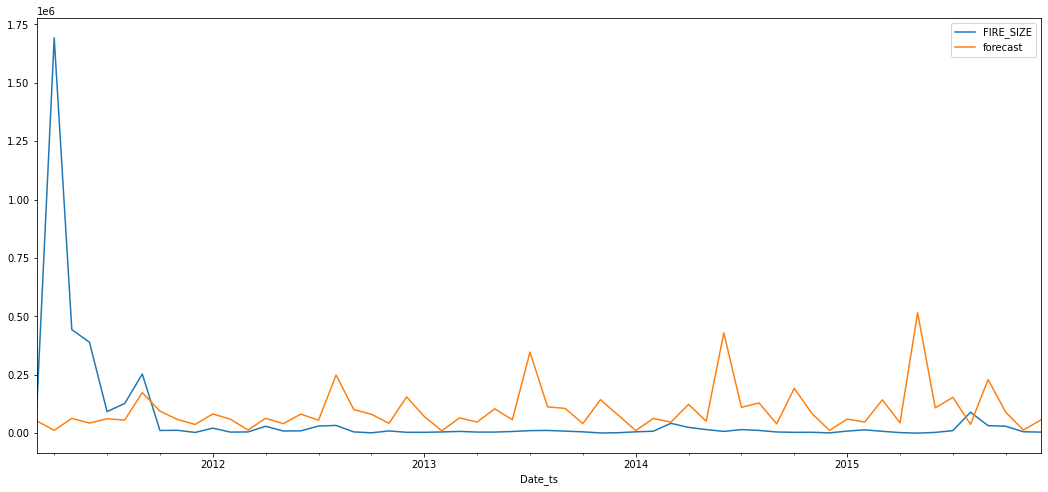

In [74]:
a_s=test.to_frame()
a_s["forecast"]=f
a_s.plot()

In [76]:
rmse = sqrt(mean_squared_error(test, f))
rmse

263306.6248246653